In [1]:
import neuraltda.topology2 as tp2
import pandas as pd
from joblib import Parallel, delayed
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import datetime
import pickle
import glob
import os
from ephys import core, events, clust
import numpy as np
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

In [5]:
# Bin The Data

# Correct/Incorrect
winSizes = [5.0, 10.0, 25.0, 50.0]
segmentInfo = [0, 0] # Sample + Target/Distractor period
#segmentInfo = [2500, 0] # Target+Distractor period
povers = 0.5

blockPath='/home/brad/emily/P01S15/'

In [ ]:
# Just correct vs. Incorrect
spikes = core.load_spikes(blockPath)
trials = events.load_trials(blockPath)
fs = core.load_fs(blockPath)
clusters = core.load_clusters(blockPath)

correctTrials = trials[trials['correct']==True]
incorrectTrials = trials[trials['correct']==False]

Parallel(n_jobs=5)(delayed(tp2.do_dag_bin_lazy)(blockPath, spikes, correctTrials, clusters, 
                                           fs, winSize, segmentInfo, cluster_group=['Good', 'MUA'], 
                                           dtOverlap=povers*winSize, comment='correct') for winSize in winSizes)

Parallel(n_jobs=5)(delayed(tp2.do_dag_bin_lazy)(blockPath, spikes, incorrectTrials, clusters, 
                                           fs, winSize, segmentInfo, cluster_group=['Good', 'MUA'], 
                                           dtOverlap=povers*winSize, comment='incorrect') for winSize in winSizes)

In [3]:
# Sample-Distractor Period


winSize = 10.0 #ms
thresh = 13.0
povers = 0.5
cluster_group = ['Good', 'MUA']
widenarrow_threshold = 0.000230 # sw threshold in seconds
segmentInfo = [2500, 0] # Sample/Distractor Period
spikes = core.load_spikes(blockPath)
trials = events.load_trials(blockPath)
fs = core.load_fs(blockPath)

# Get wide/narrow clusters
clusters = core.load_clusters(blockPath)
clusters_list = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()
(wide, narrow) = clust.get_wide_narrow(blockPath, clusters_list, widenarrow_threshold)

# Get Correct/Incorrect Trials
correctTrials = trials[trials['correct']==True]
incorrectTrials = trials[trials['correct']==False]

# Bin and compute SCG
bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, correctTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-correct')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf))

sa.computeChainGroups(blockPath, bdf, thresh, comment='SD-correct-wide', clusters=wide)

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, correctTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-correct')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf, thresh, comment='SD-correct-narrow', clusters=narrow)

bfdict2 = tp2.do_dag_bin_lazy(blockPath, spikes, incorrectTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-incorrect')
bdf2 = glob.glob(os.path.join(bfdict2['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf2, thresh, comment='SD-incorrect-wide', clusters=wide)

bfdict2 = tp2.do_dag_bin_lazy(blockPath, spikes, incorrectTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-incorrect')

bdf2 = glob.glob(os.path.join(bfdict2['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf2, thresh, comment='SD-incorrect-narrow', clusters=narrow)


bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, correctTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-correct')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf, thresh, comment='SD-correct-wide-shuffle', clusters=wide,shuffle=True)

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, correctTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-correct')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf, thresh, comment='SD-correct-narrow-shuffle', clusters=narrow, shuffle=True)

bfdict2 = tp2.do_dag_bin_lazy(blockPath, spikes, incorrectTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-incorrect')
bdf2 = glob.glob(os.path.join(bfdict2['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf2, thresh, comment='SD-incorrect-wide-shuffle', clusters=wide, shuffle=True)

bfdict2 = tp2.do_dag_bin_lazy(blockPath, spikes, incorrectTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-incorrect')
bdf2 = glob.glob(os.path.join(bfdict2['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf2, thresh, comment='SD-incorrect-narrow-shuffle', clusters=narrow, shuffle=True)


BDF: /home/brad/emily/P01S15/binned_data/win-10.0_dtovr-5.0_seg-2500-0-SD-correct/20170516T175353Z-10.0-5.0.binned
Computing Chain Groups...
[u'T3S3D-1', u'T3S3D40', u'T3S8D-1', u'T3S8D40', u'T40S40D-1', u'T40S40D3', u'T40S70D-1', u'T40S70D3']
Stim: T3S3D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 12)


/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:224: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
7
5
6
8
9
10
11
SCGGenSave: 12
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 22)
0
1
2
3
4
5
6
7
8
9
10
11
13
12
14
15
16
17
18
20
19
21
SCGGenSave: 22
Stim: T3S8D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400,

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
SCGGenSave: 12
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 22)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
SCGGenSave: 22
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T40S40D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Cl

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
SCGGenSave: 3
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 14)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
SCGGenSave: 14
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 18)
0
1
2
3
4
6
7
5
9
10
8
11
12
13
14
16
17
15
SCGGenSave: 18
Stim: T3S8D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 17)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
SCGGenSave: 17
Stim: T40S40D-1, 

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
SCGGenSave: 3
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 14)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
SCGGenSave: 14
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 18)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
SCGGenSave: 18
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 17)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
SCGGenSave: 17
Stim: T40S40D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 6)
0
2
3
1
4
5
SCGGenSave: 6
Stim: T40S40D3, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
SCGGenSave: 12
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 22)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
SCGGenSave: 22
Stim: T3S8D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400,

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
SCGGenSave: 12
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 22)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
SCGGenSave: 22
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T40S40D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Cl

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
SCGGenSave: 3
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 14)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
SCGGenSave: 14
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 18)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
SCGGenSave: 18
Stim: T3S8D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 17)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
SCGGenSave: 17
Stim: T40S40D-1, 

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
SCGGenSave: 3
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 14)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
SCGGenSave: 14
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 18)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
SCGGenSave: 18
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 17)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
SCGGenSave: 17
Stim: T40S40D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 6)
0
1
2
3
4
5
SCGGenSave: 6
Stim: T40S40D3, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33

In [4]:
# Target Period

winSize = 10.0 #ms
thresh = 13.0
povers = 0.5
cluster_group = ['Good', 'MUA']
widenarrow_threshold = 0.000230 # sw threshold in seconds
segmentInfo = [0, -2500.] # Target period
spikes = core.load_spikes(blockPath)
trials = events.load_trials(blockPath)
fs = core.load_fs(blockPath)

#Get Wide/Narrow Clusters
clusters = core.load_clusters(blockPath)
clusters_list = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()

(wide, narrow) = clust.get_wide_narrow(blockPath, clusters_list, widenarrow_threshold)

# Get Correct/Incorrect Trials
correctTrials = trials[trials['correct']==True]
incorrectTrials = trials[trials['correct']==False]


# bin and make SCG
bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, correctTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ-correct')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print(bdf)
sa.computeChainGroups(blockPath, bdf, thresh, comment='Targ-correct-wide', clusters=wide)

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, correctTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ-correct')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]

print(bdf)
sa.computeChainGroups(blockPath, bdf, thresh, comment='Targ-correct-narrow', clusters=narrow)

bfdict2 = tp2.do_dag_bin_lazy(blockPath, spikes, incorrectTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ-incorrect')
bdf2 = glob.glob(os.path.join(bfdict2['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf2, thresh, comment='Targ-incorrect-wide', clusters=wide)
print(bdf)

bfdict2 = tp2.do_dag_bin_lazy(blockPath, spikes, incorrectTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ-incorrect')
bdf2 = glob.glob(os.path.join(bfdict2['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf2, thresh, comment='Targ-incorrect-narrow', clusters=narrow)


bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, correctTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ-correct')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print(bdf)
sa.computeChainGroups(blockPath, bdf, thresh, comment='Targ-correct-wide-shuffle', clusters=wide, shuffle=True)

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, correctTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ-correct')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]

print(bdf)
sa.computeChainGroups(blockPath, bdf, thresh, comment='Targ-correct-narrow-shuffle', clusters=narrow, shuffle=True)

bfdict2 = tp2.do_dag_bin_lazy(blockPath, spikes, incorrectTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ-incorrect')
bdf2 = glob.glob(os.path.join(bfdict2['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf2, thresh, comment='Targ-incorrect-wide-shuffle', clusters=wide, shuffle=True)
print(bdf)

bfdict2 = tp2.do_dag_bin_lazy(blockPath, spikes, incorrectTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ-incorrect')
bdf2 = glob.glob(os.path.join(bfdict2['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf2, thresh, comment='Targ-incorrect-narrow-shuffle', clusters=narrow, shuffle=True)
                     

/home/brad/emily/P01S15/binned_data/win-10.0_dtovr-5.0_seg-0--2500.0-Targ-correct/20170516T175952Z-10.0-5.0.binned
Computing Chain Groups...
[u'T3S3D-1', u'T3S3D40', u'T3S8D-1', u'T3S8D40', u'T40S40D-1', u'T40S40D3', u'T40S70D-1', u'T40S70D3']
Stim: T3S3D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 12)


Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
5
6
4
7
8
10
11
9
SCGGenSave: 12
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 29)
0
1
2
3
4
5
6
7
8
9
11
10
12
13
14
15
16
17
18
19
20
21
22
23
24
26
27
25
28
SCGGenSave: 29
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 22)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
17
16
18
19
20
21
SCGGenSave: 22
Stim: T3S8D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400,

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
SCGGenSave: 12
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 22)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
SCGGenSave: 22
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T40S40D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Cl

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
SCGGenSave: 3
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 14)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
SCGGenSave: 14
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 18)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
17
16
SCGGenSave: 18
Stim: T3S8D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 17)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
SCGGenSave: 17
Stim: T40S40D-1, 

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
SCGGenSave: 3
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 14)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
SCGGenSave: 14
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 18)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
SCGGenSave: 18
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 17)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
SCGGenSave: 17
Stim: T40S40D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 6)
0
1
2
3
4
5
SCGGenSave: 6
Stim: T40S40D3, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
SCGGenSave: 12
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 22)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
SCGGenSave: 22
Stim: T3S8D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400,

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
SCGGenSave: 12
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 22)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
SCGGenSave: 22
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
SCGGenSave: 29
Stim: T40S40D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Cl

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
SCGGenSave: 3
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 14)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
SCGGenSave: 14
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 18)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
SCGGenSave: 18
Stim: T3S8D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 17)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
SCGGenSave: 17
Stim: T40S40D-1, 

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
SCGGenSave: 3
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 14)
0
1
2
3
4
5
6
7
8
9
11
10
12
13
SCGGenSave: 14
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 18)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
SCGGenSave: 18
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 17)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
SCGGenSave: 17
Stim: T40S40D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 6)
0
1
2
3
4
5
SCGGenSave: 6
Stim: T40S40D3, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33

In [11]:
# Passive Listneing

winSize = 10.0 #ms
thresh = 13.0
povers = 0.5
cluster_group = ['Good', 'MUA']
widenarrow_threshold = 0.000230 # sw threshold in seconds
segmentInfo = [2500, 0] # SD period
spikes = core.load_spikes(blockPath)
trials = events.load_trials(blockPath)
fs = core.load_fs(blockPath)

#Get Wide/Narrow Clusters
clusters = core.load_clusters(blockPath)
clusters_list = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()

(wide, narrow) = clust.get_wide_narrow(blockPath, clusters_list, widenarrow_threshold)

# Get Passive Trials
passiveTrials = trials[-(trials['correct'].isin([True, False]))]


# bin and make SCG
bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, passiveTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-passive')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print(bdf)
sa.computeChainGroups(blockPath, bdf, thresh, comment='SD-passive-wide', clusters=wide)

###
bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, passiveTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-passive')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print(bdf)
sa.computeChainGroups(blockPath, bdf, thresh, comment='SD-passive-narrow', clusters=narrow)



bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, passiveTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-passive')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print(bdf)
sa.computeChainGroups(blockPath, bdf, thresh, comment='SD-passive-wide-shuffle', clusters=wide, shuffle=True)

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, passiveTrials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='SD-passive')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print(bdf)
sa.computeChainGroups(blockPath, bdf, thresh, comment='SD-passive-narrow-shuffle', clusters=narrow, shuffle=True)


Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


Data Not already binned
Activity Tensor: Duration <= 0
Activity Tensor: Duration <= 0
/home/brad/emily/P01S15/binned_data/win-10.0_dtovr-5.0_seg-2500-0-SD-passive/20170519T172557Z-10.0-5.0.binned
Computing Chain Groups...
[u'T-1S-1D3', u'T-1S-1D40', u'T3S3D-1', u'T3S3D40', u'T3S8D-1', u'T3S8D40', u'T40S40D-1', u'T40S40D3', u'T40S70D-1', u'T40S70D3']
Stim: T-1S-1D3, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Poptens Error
Stim: T-1S-1D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Poptens Error
Stim: T3S3D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 11

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
SCGGenSave: 10
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 21)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
SCGGenSave: 21
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 11)
0
1
2
3
4
5
6
7
8
9
10
SCGGenSave: 11
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 21)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
SCGGenSave: 21
Stim: T40S40D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 15)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
SCGGenSave: 15
Stim: T

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
5
4
6
7
8
9
SCGGenSave: 10
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 21)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
SCGGenSave: 21
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 11)
0
1
2
3
4
5
6
7
8
9
10
SCGGenSave: 11
Stim: T3S8D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 21)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
SCGGe

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
3
2
4
5
6
7
8
9
SCGGenSave: 10
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 21)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
SCGGenSave: 21
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 11)
0
1
2
3
4
5
6
7
8
9
10
SCGGenSave: 11
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 21)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
SCGGenSave: 21
Stim: T40S40D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 15)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
SCGGenSave: 15
Stim: T

In [2]:
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'.scg')
    fnames[p] = k
print(fnames)



{'Targ': ['Targ-correct-wide.scg', 'Targ-correct-narrow.scg', 'Targ-incorrect-wide.scg', 'Targ-incorrect-narrow.scg'], 'SD': ['SD-correct-wide.scg', 'SD-correct-narrow.scg', 'SD-incorrect-wide.scg', 'SD-incorrect-narrow.scg']}


In [3]:
def JS_vs_beta_pairwise_attn(beta, scg_A, scg_B, d):
    '''
    Compute pairwise divergences between trials 
    for spike trains A and B represented as simplicial complexes
    '''
    divsave = []
    divincsave = []
    diffsave = []
    ntrials1 = len(scg_A)
    ntrials2 = len(scg_B)
    for ind in range(ntrials1):
        for ind2 in range(ntrials2): 
            #print(stim1, t1, stim2, t2)
            scgAt = scg_A[ind] #SD
            scgBt = scg_B[ind2] #Targ
            div = sa.compute_JS_expanded(scgAt, scgBt, d, beta)
            divsave.append(float(div))
    m1 = np.mean(divsave)
    sd1 = np.std(divsave)

    return divsave

# this is within trial.. not actually pairwise...
def JS_vs_beta_within_trial(beta, stim, scgSD, scgT, d):
    divsave = []
    divincsave = []
    diffsave = []
    ntrials = min([len(scgSD[stim]), len(scgT[stim])])
    for ind in range(ntrials):
            #print(stim1, t1, stim2, t2)
        scgA = scgSD[stim][ind] #SD
        scgB = scgT[stim][ind] #Targ
        div = sa.compute_JS_expanded(scgA, scgB, d, beta)
        divsave.append(float(div))
    m1 = np.mean(divsave)
    sd1 = np.std(divsave)

    return divsave

def JS_vs_beta_pairwise(beta, stim, scg_Af, scg_Bf, d):
    '''
    Compute pairwise divergences between trials 
    for spike trains A and B represented as simplicial complexes
    '''
    divsave = []
    divincsave = []
    diffsave = []
    scg_A = scg_Af[stim]
    scg_B = scg_Bf[stim]
    ntrials1 = len(scg_A)
    ntrials2 = len(scg_B)
    for ind in range(ntrials1):
        for ind2 in range(ntrials2):
            #print(stim1, t1, stim2, t2)
            scgAt = scg_A[ind] #SD
            scgBt = scg_B[ind2] #Targ
            div = sa.compute_JS_expanded(scgAt, scgBt, d, beta)
            divsave.append(float(div))
    m1 = np.mean(divsave)
    sd1 = np.std(divsave)

    return divsave

In [6]:
# Distance between SD and Target within trials

apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'.scg')
    fnames[p] = k
print(fnames)



AllSave = {}
for tc, sdc in zip(fnames['Targ'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgSD = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgT = pickle.load(scgf)
    stims = scgSD.keys()
    print(stims)
    stims2 = scgT.keys()
    print(stims2)
    betas = np.linspace(0.001, 1,20)

    msdActSave = {}
    msdPassSave = []
    for stim in stims:
        print(stim)
        msdAct = []
        msdPass = []
        for beta in tqdm.tqdm(betas):
            divsave = JS_vs_beta_pairwise(beta, stim, scgSD, scgT, 1)
            msdAct.append(divsave)
        msdActSave[stim] = np.array(msdAct)
    AllSave[tc] = msdActSave
    
import pickle
datestring = datetime.datetime.now().strftime('%Y%m%d-%H%M')
with open(os.path.join(blockPath,'{}_B604_1SLSE_pairwise_comparison.pkl'.format(datestring)), 'wb') as out:
    pickle.dump(AllSave, out)
    

{'Targ': ['Targ-correct-wide.scg', 'Targ-correct-narrow.scg', 'Targ-incorrect-wide.scg', 'Targ-incorrect-narrow.scg'], 'SD': ['SD-correct-wide.scg', 'SD-correct-narrow.scg', 'SD-incorrect-wide.scg', 'SD-incorrect-narrow.scg']}
('/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-wide.scg', '/home/brad/emily/P01S15/scg/20170516T175952Z-10.0-5.0-13.0-Targ-correct-wide.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S40D-1


  0%|          | 0/20 [00:00<?, ?it/s]

('/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-narrow.scg', '/home/brad/emily/P01S15/scg/20170516T175952Z-10.0-5.0-13.0-Targ-correct-narrow.scg')
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S40D-1


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


('/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-wide.scg', '/home/brad/emily/P01S15/scg/20170516T180003Z-10.0-5.0-13.0-Targ-incorrect-wide.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S40D-1


  0%|          | 0/20 [00:00<?, ?it/s]

('/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-narrow.scg', '/home/brad/emily/P01S15/scg/20170516T180003Z-10.0-5.0-13.0-Targ-incorrect-narrow.scg')
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


 30%|███       | 6/20 [00:00<00:00, 50.55it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


 15%|█▌        | 3/20 [00:00<00:00, 23.10it/s]

T40S40D-1


100%|██████████| 20/20 [00:00<00:00, 20.36it/s]


In [7]:
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'-shuffle.scg')
    fnames[p] = k
print(fnames)



AllSave = {}
for tc, sdc in zip(fnames['Targ'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgSD = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgT = pickle.load(scgf)
    stims = scgSD.keys()
    print(stims)
    stims2 = scgT.keys()
    print(stims2)
    betas = np.linspace(0.001, 1,20)

    msdActSave = {}
    msdPassSave = []
    for stim in stims:
        print(stim)
        msdAct = []
        msdPass = []
        for beta in tqdm.tqdm(betas):
            divsave = JS_vs_beta_pairwise(beta, stim, scgSD, scgT, 1)
            msdAct.append(divsave)
        msdActSave[stim] = np.array(msdAct)
    AllSave[tc] = msdActSave
    
import pickle
datestring = datetime.datetime.now().strftime('%Y%m%d-%H%M')
with open(os.path.join(blockPath,'{}_B604_1SLSE_pairwise_comparison_shuffled.pkl'.format(datestring)), 'wb') as out:
    pickle.dump(AllSave, out)

{'Targ': ['Targ-correct-wide-shuffle.scg', 'Targ-correct-narrow-shuffle.scg', 'Targ-incorrect-wide-shuffle.scg', 'Targ-incorrect-narrow-shuffle.scg'], 'SD': ['SD-correct-wide-shuffle.scg', 'SD-correct-narrow-shuffle.scg', 'SD-incorrect-wide-shuffle.scg', 'SD-incorrect-narrow-shuffle.scg']}
('/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-wide-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T175952Z-10.0-5.0-13.0-Targ-correct-wide-shuffle.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S40D-1


  0%|          | 0/20 [00:00<?, ?it/s]

('/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-narrow-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T175952Z-10.0-5.0-13.0-Targ-correct-narrow-shuffle.scg')
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


  5%|▌         | 1/20 [00:00<00:03,  5.01it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S40D-1


100%|██████████| 20/20 [00:08<00:00,  2.25it/s]


('/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-wide-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T180003Z-10.0-5.0-13.0-Targ-incorrect-wide-shuffle.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S40D-1


  0%|          | 0/20 [00:00<?, ?it/s]

('/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-narrow-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T180003Z-10.0-5.0-13.0-Targ-incorrect-narrow-shuffle.scg')
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


 40%|████      | 8/20 [00:00<00:00, 70.70it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


 15%|█▌        | 3/20 [00:00<00:00, 26.05it/s]

T40S40D-1


100%|██████████| 20/20 [00:00<00:00, 22.12it/s]


In [22]:
# Comparing Attend Hi SD to Attend Lo SD, pairwise

apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'.scg')
    fnames[p] = k
print(fnames)


AllSave = {}

stim_hi = 'T40S40D3'
stim_lo = 'T3S3D40'
for tc, sdc in zip(fnames['SD'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgHi = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgLo = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise_attn(beta,scgHi[stim_hi], scgLo[stim_lo], 1)
        msdActSave.append(divsave)
    AllSave[tc] = msdActSave
    
import pickle
with open(os.path.join(blockPath,'B604_1SLSE_pairwise_comparisons_attn_comparison_versionFull2.pkl'), 'wb') as out:
    pickle.dump(AllSave, out)
    

{'Targ': ['Targ-correct-wide.scg', 'Targ-correct-narrow.scg', 'Targ-incorrect-wide.scg', 'Targ-incorrect-narrow.scg'], 'SD': ['SD-correct-wide.scg', 'SD-correct-narrow.scg', 'SD-incorrect-wide.scg', 'SD-incorrect-narrow.scg']}
('/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-wide.scg', '/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-wide.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

('/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-narrow.scg', '/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-narrow.scg')


100%|██████████| 20/20 [00:29<00:00,  1.52s/it]


('/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-wide.scg', '/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-wide.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

('/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-narrow.scg', '/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-narrow.scg')


100%|██████████| 20/20 [00:08<00:00,  2.40it/s]


In [23]:
# Comparing Attend Hi SD to Attend Lo SD, pairwise, shuffled
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'-shuffle.scg')
    fnames[p] = k
print(fnames)
AllSaveShuff = {}

stim_hi = 'T40S40D3'
stim_lo = 'T3S3D40'
for tc, sdc in zip(fnames['SD'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgHi = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgLo = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise_attn(beta,scgHi[stim_hi], scgLo[stim_lo], 1)
        msdActSave.append(divsave)
    AllSaveShuff[tc] = msdActSave
    
import pickle
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_attn_comparison_versionFull2_shuffle.pkl'), 'wb') as out:
    pickle.dump(AllSaveShuff, out)
    


{'Targ': ['Targ-correct-wide-shuffle.scg', 'Targ-correct-narrow-shuffle.scg', 'Targ-incorrect-wide-shuffle.scg', 'Targ-incorrect-narrow-shuffle.scg'], 'SD': ['SD-correct-wide-shuffle.scg', 'SD-correct-narrow-shuffle.scg', 'SD-incorrect-wide-shuffle.scg', 'SD-incorrect-narrow-shuffle.scg']}
('/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-wide-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-wide-shuffle.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

('/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-narrow-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-narrow-shuffle.scg')


100%|██████████| 20/20 [00:26<00:00,  1.36s/it]


('/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-wide-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-wide-shuffle.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

('/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-narrow-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-narrow-shuffle.scg')


100%|██████████| 20/20 [00:06<00:00,  2.89it/s]


In [12]:
#Passive

apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['P']
ci = ['C', 'I']
fnames = {}
fnameshuff = {}
for p in periods:
    k = []
    j = []
    for a in ap:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + apdict[a] + q +'.scg')
            j.append(p + '-' + apdict[a] + q +'-shuffle.scg')
    fnames[p] = k
    fnameshuff[p] = j
print(fnames)
print(fnameshuff)

{'SD': ['SD-passive-wide.scg', 'SD-passive-narrow.scg']}
{'SD': ['SD-passive-wide-shuffle.scg', 'SD-passive-narrow-shuffle.scg']}


In [18]:
# Passive Shuffle
AllSaveShuff = {}

stim_hi = 'T40S40D3'
stim_lo = 'T3S3D40'

AllSave = {}


for tc, sdc in zip(fnames['SD'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgHi = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgLo = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise_attn(beta,scgHi[stim_hi], scgLo[stim_lo], 1)
        msdActSave.append(divsave)
    AllSave[tc] = msdActSave
    
import pickle
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_passive_HivsLo.pkl'), 'wb') as out:
    pickle.dump(AllSave, out)

('/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-wide.scg', '/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-wide.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

('/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-narrow.scg', '/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-narrow.scg')


100%|██████████| 20/20 [00:22<00:00,  1.17s/it]


In [14]:
for tc, sdc in zip(fnameshuff['SD'], fnameshuff['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgHi = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgLo = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise_attn(beta,scgHi[stim_hi], scgLo[stim_lo], 1)
        msdActSave.append(divsave)
    AllSaveShuff[tc] = msdActSave
    
import pickle
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_passive_HivsLo_shuffle.pkl'), 'wb') as out:
    pickle.dump(AllSaveShuff, out)
    

('/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-wide.scg', '/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-wide.scg')




  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:21<06:50, 21.59s/it]

 10%|█         | 2/20 [00:41<06:19, 21.09s/it]

 15%|█▌        | 3/20 [01:03<06:01, 21.24s/it]

 20%|██        | 4/20 [01:21<05:27, 20.47s/it]

 25%|██▌       | 5/20 [01:41<05:02, 20.15s/it]

 30%|███       | 6/20 [02:01<04:42, 20.18s/it]

 35%|███▌      | 7/20 [02:20<04:17, 19.80s/it]

 40%|████      | 8/20 [02:40<03:57, 19.79s/it]

 45%|████▌     | 9/20 [02:58<03:34, 19.51s/it]

 50%|█████     | 10/20 [03:17<03:11, 19.14s/it]

 55%|█████▌    | 11/20 [03:35<02:49, 18.88s/it]

 60%|██████    | 12/20 [03:53<02:29, 18.69s/it]

 65%|██████▌   | 13/20 [04:13<02:12, 18.91s/it]

 70%|███████   | 14/20 [04:35<01:59, 19.89s/it]

 75%|███████▌  | 15/20 [04:56<01:41, 20.35s/it]

 80%|████████  | 16/20 [05:14<01:18, 19.68s/it]

 85%|████████▌ | 17/20 [05:36<01:00, 20.31s/it]

 90%|█████████ | 18/20 [06:00<00:42, 21.32s/it]

 95%|█████████▌| 19/20 [06:24<00:22, 22.03s/it]

100%|██████████| 20/20 [06:44<00:00

('/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-narrow.scg', '/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-narrow.scg')


100%|██████████| 20/20 [00:22<00:00,  1.16s/it]


('/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-wide-shuffle.scg', '/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-wide-shuffle.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

('/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-narrow-shuffle.scg', '/home/brad/emily/P01S15/scg/20170519T172557Z-10.0-5.0-13.0-SD-passive-narrow-shuffle.scg')


100%|██████████| 20/20 [00:27<00:00,  1.20s/it]


In [27]:
# Comparing cues by them selves to combined stimuli for attend hi vs attend lo, pairwise
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
fnameshuff = {}
for p in periods:
    k = []
    j = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'.scg')
            j.append(p + '-' + cidict[a] + q +'-shuffle.scg')
    fnames[p] = k
    fnameshuff[p] = j
print(fnames)
print(fnameshuff)
full_names = ['Full-wide.scg', 'Full-wide.scg', 'Full-narrow.scg', 'Full-narrow.scg']
full_nameshuff = ['Full-wide-shuffle.scg', 'Full-wide-shuffle.scg', 'Full-narrow-shuffle.scg', 'Full-narrow-shuffle.scg']


AllSaveShuff = {}

stim_hi = 'T40S40D3'
stim_lo = 'T3S3D40'

stim_cue_hi = 'T-1S-1D40'
stim_cue_lo = 'T-1S-1D3'

AllSave = {}


for tc, sdc in zip(fnames['SD'], full_names):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0] #Full
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0] # SD
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgFull = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgSD = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = {}
    for hi_lo in [stim_hi, stim_lo]:
        for cue in [stim_cue_hi, stim_cue_lo]:
            jsd_save = []
            for beta in tqdm.tqdm(betas):
                divsave = JS_vs_beta_pairwise_attn(beta,scgFull[cue], scgSD[hi_lo], 1)
                jsd_save.append(divsave)
            msdActSave[cue+'-'+hi_lo] = jsd_save
    AllSave[tc] = msdActSave
    
import pickle
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_emily.pkl'), 'wb') as out:
    pickle.dump(AllSave, out)
    
for tc, sdc in zip(fnameshuff['SD'], full_nameshuff):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0] #Full
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0] # SD
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgFull = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgSD = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = {}
    for hi_lo in [stim_hi, stim_lo]:
        for cue in [stim_cue_hi, stim_cue_lo]:
            jsd_save = []
            for beta in tqdm.tqdm(betas):
                divsave = JS_vs_beta_pairwise_attn(beta,scgFull[cue], scgSD[hi_lo], 1)
                jsd_save.append(divsave)
            msdActSave[cue+'-'+hi_lo] = jsd_save
    AllSave[tc] = msdActSave
    
import pickle
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_emily_shuff.pkl'), 'wb') as out:
    pickle.dump(AllSave, out)

{'Targ': ['Targ-correct-wide.scg', 'Targ-correct-narrow.scg', 'Targ-incorrect-wide.scg', 'Targ-incorrect-narrow.scg'], 'SD': ['SD-correct-wide.scg', 'SD-correct-narrow.scg', 'SD-incorrect-wide.scg', 'SD-incorrect-narrow.scg']}
{'Targ': ['Targ-correct-wide-shuffle.scg', 'Targ-correct-narrow-shuffle.scg', 'Targ-incorrect-wide-shuffle.scg', 'Targ-incorrect-narrow-shuffle.scg'], 'SD': ['SD-correct-wide-shuffle.scg', 'SD-correct-narrow-shuffle.scg', 'SD-incorrect-wide-shuffle.scg', 'SD-incorrect-narrow-shuffle.scg']}
('/home/brad/emily/P01S15/scg/20170517T171629Z-10.0-5.0-13.0-Full-wide.scg', '/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-wide.scg')



  5%|▌         | 1/20 [00:08<02:37,  8.30s/it]

100%|██████████| 20/20 [05:00<00:00, 14.62s/it]


('/home/brad/emily/P01S15/scg/20170517T171629Z-10.0-5.0-13.0-Full-wide.scg', '/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-narrow.scg')


100%|██████████| 20/20 [03:13<00:00,  9.59s/it]


('/home/brad/emily/P01S15/scg/20170517T171629Z-10.0-5.0-13.0-Full-narrow.scg', '/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-wide.scg')


100%|██████████| 20/20 [01:01<00:00,  3.75s/it]


('/home/brad/emily/P01S15/scg/20170517T171629Z-10.0-5.0-13.0-Full-narrow.scg', '/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-narrow.scg')


100%|██████████| 20/20 [00:07<00:00,  2.61it/s]


('/home/brad/emily/P01S15/scg/20170517T171629Z-10.0-5.0-13.0-Full-wide-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-wide-shuffle.scg')


100%|██████████| 20/20 [04:20<00:00, 12.60s/it]


('/home/brad/emily/P01S15/scg/20170517T171629Z-10.0-5.0-13.0-Full-wide-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T175353Z-10.0-5.0-13.0-SD-correct-narrow-shuffle.scg')


100%|██████████| 20/20 [03:06<00:00,  8.74s/it]


('/home/brad/emily/P01S15/scg/20170517T171748Z-10.0-5.0-13.0-Full-narrow-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-wide-shuffle.scg')


100%|██████████| 20/20 [00:49<00:00,  2.56s/it]


('/home/brad/emily/P01S15/scg/20170517T171748Z-10.0-5.0-13.0-Full-narrow-shuffle.scg', '/home/brad/emily/P01S15/scg/20170516T175404Z-10.0-5.0-13.0-SD-incorrect-narrow-shuffle.scg')


100%|██████████| 20/20 [00:06<00:00,  3.06it/s]


# Plotting

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


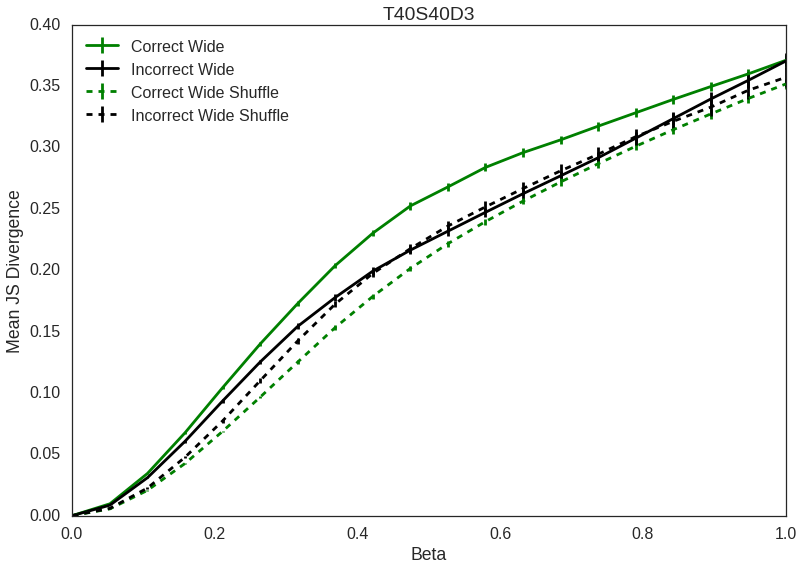

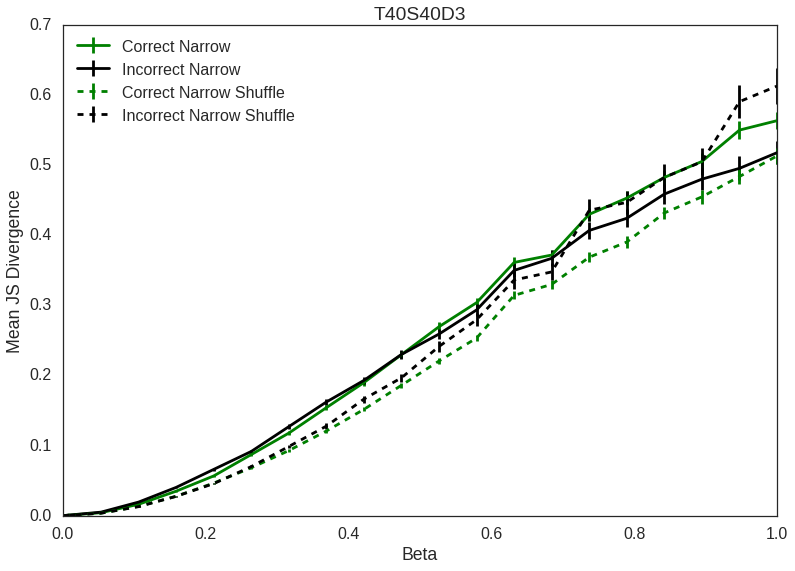

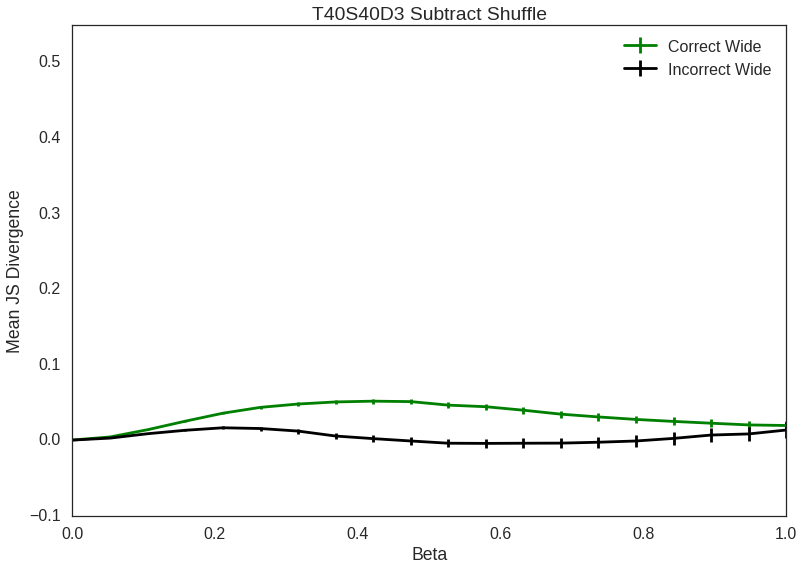

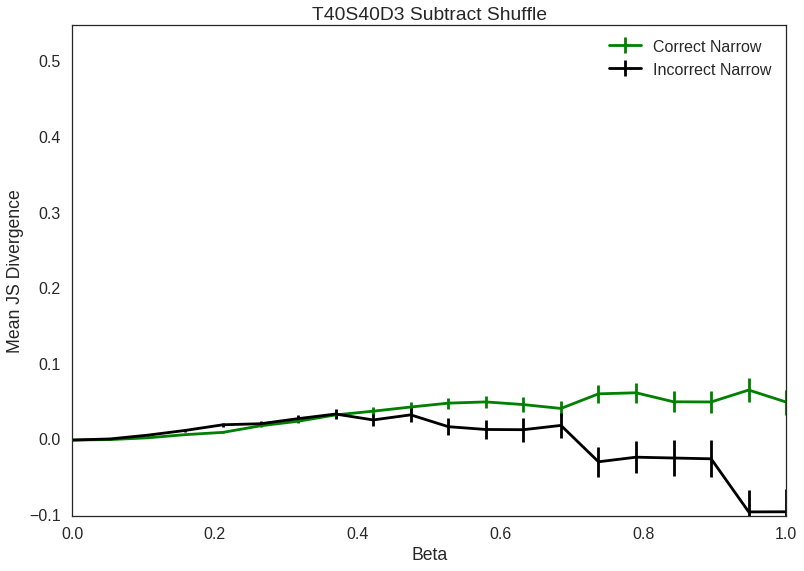

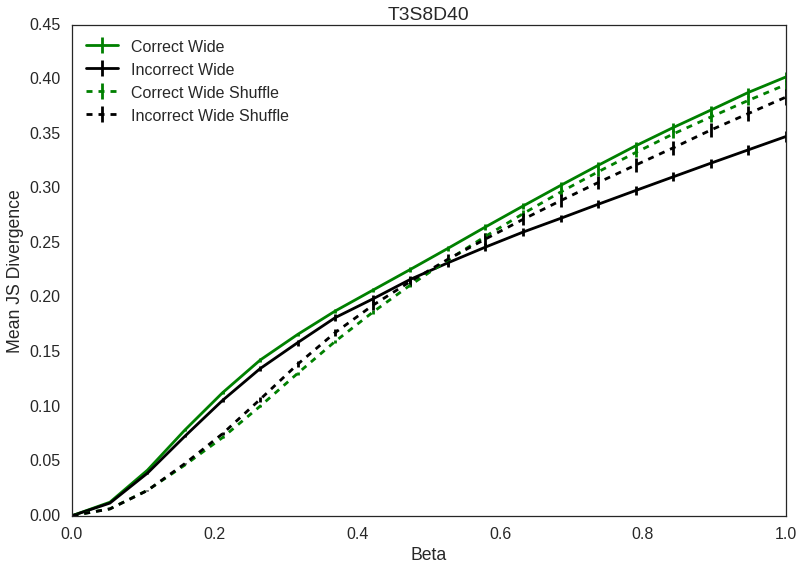

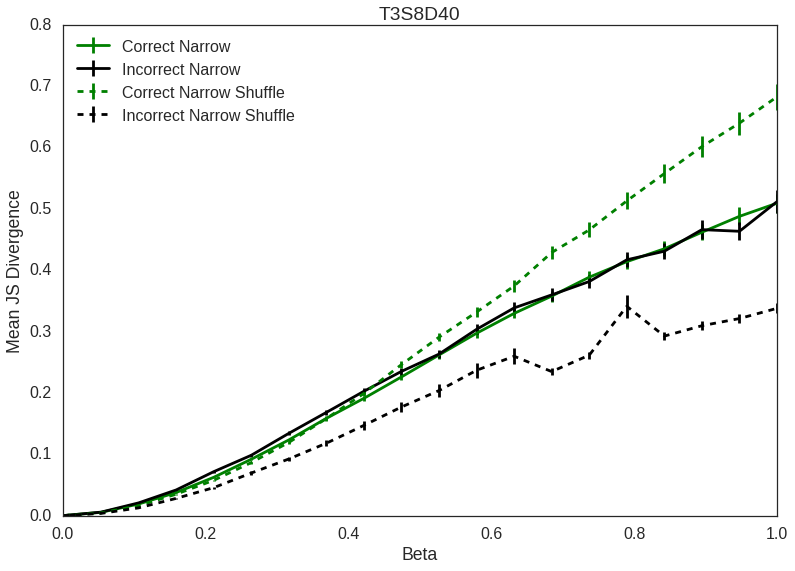

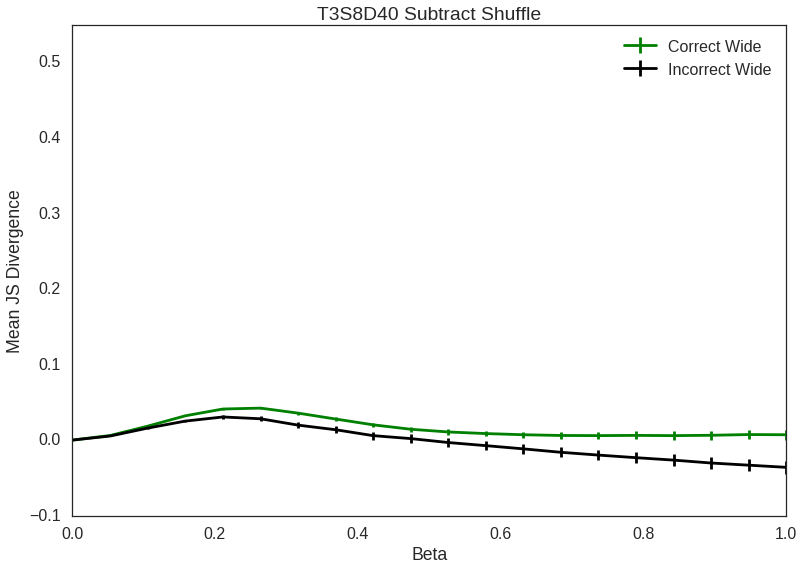

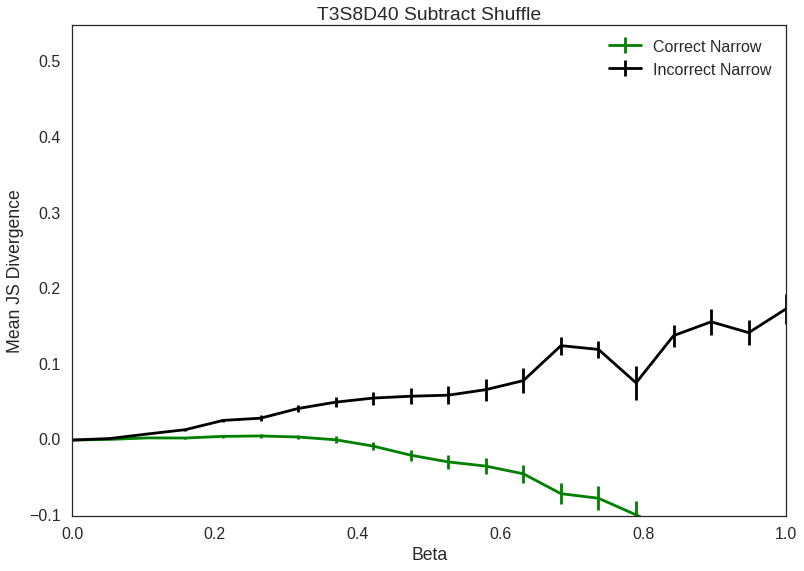

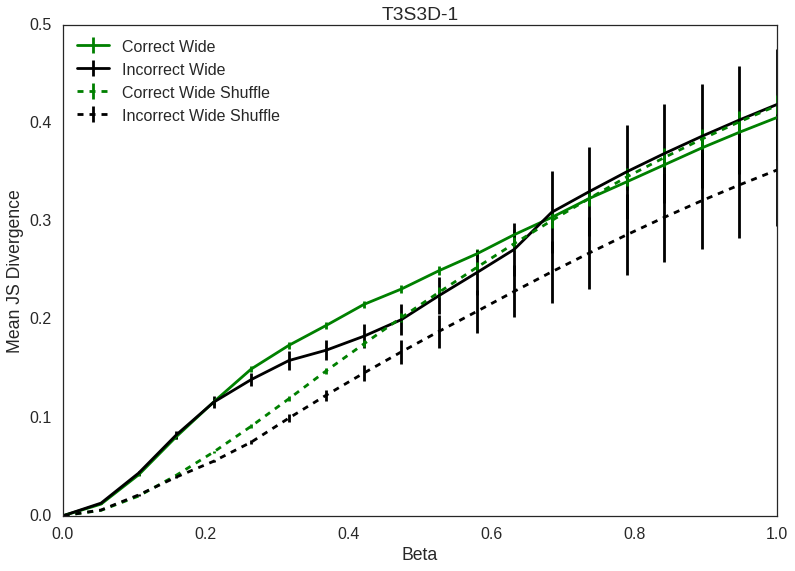

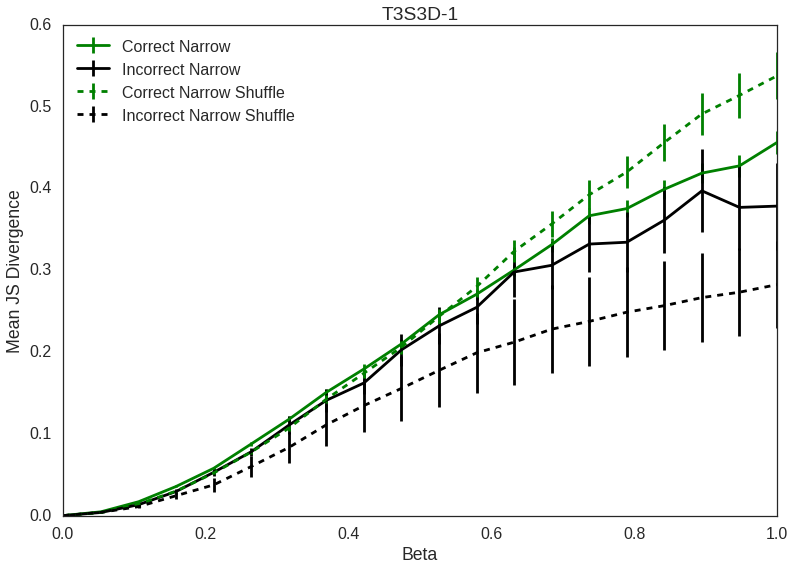

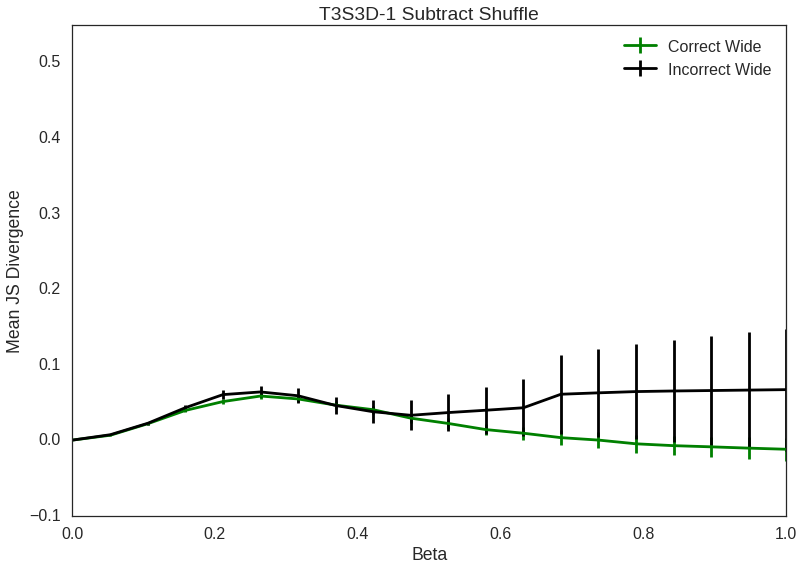

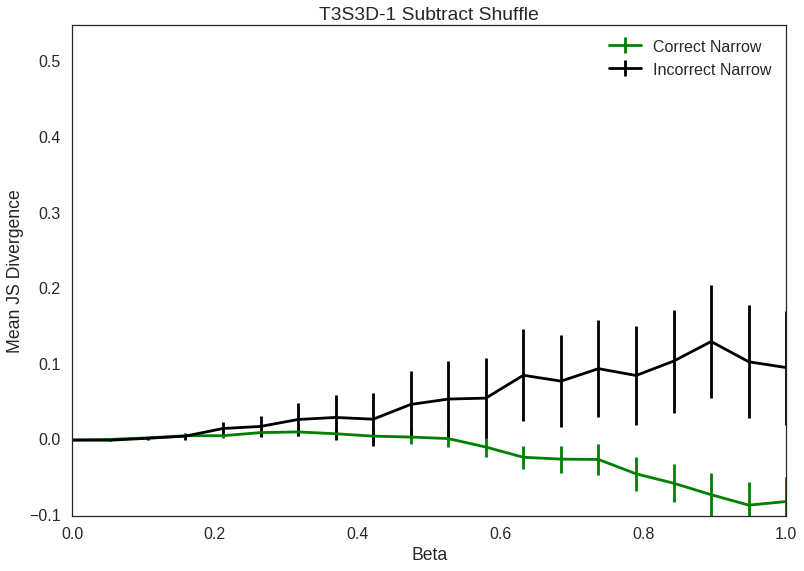

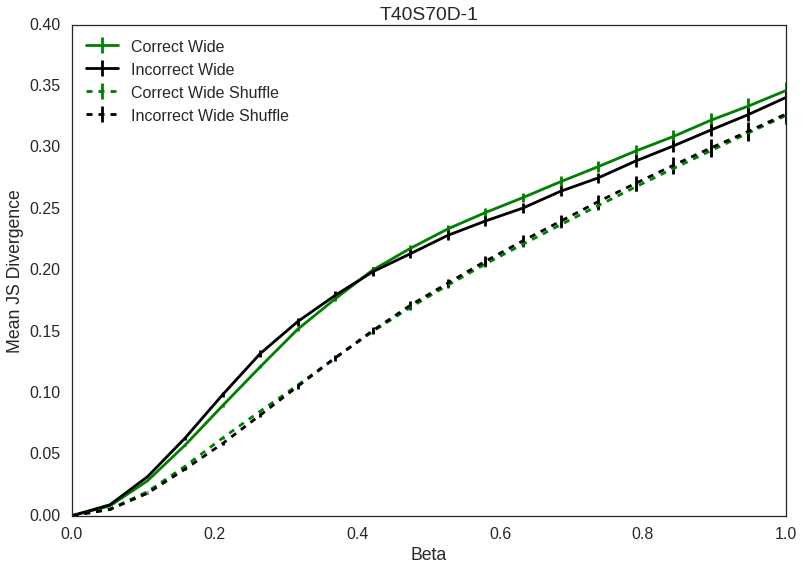

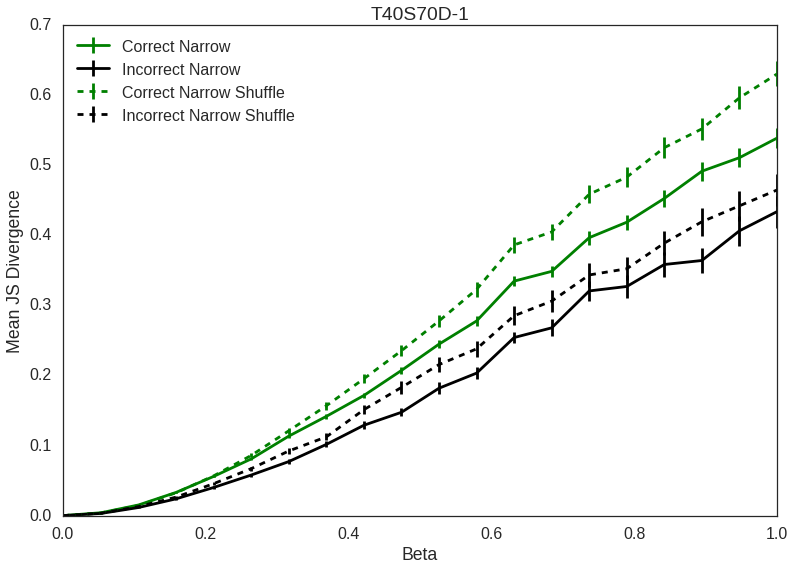

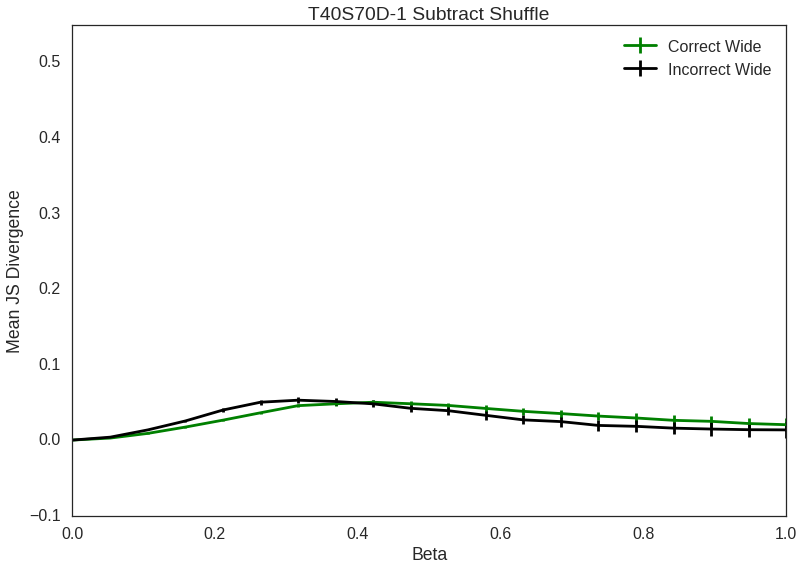

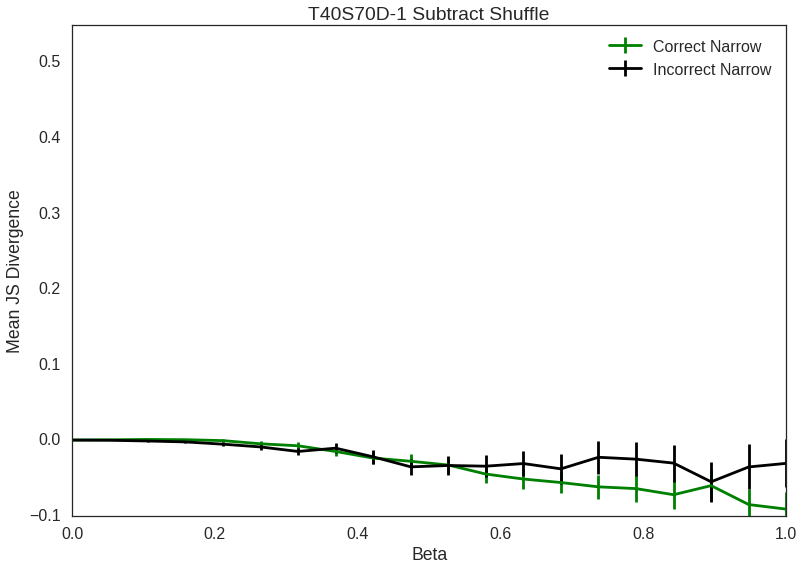

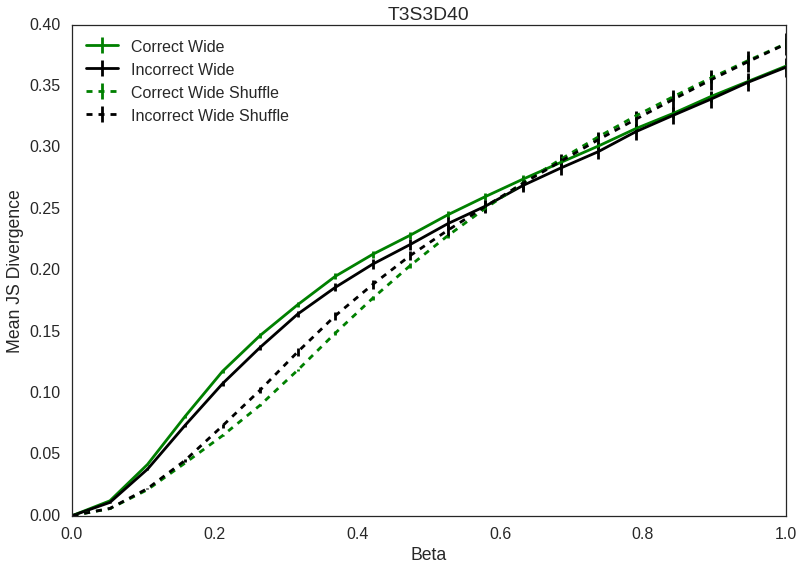

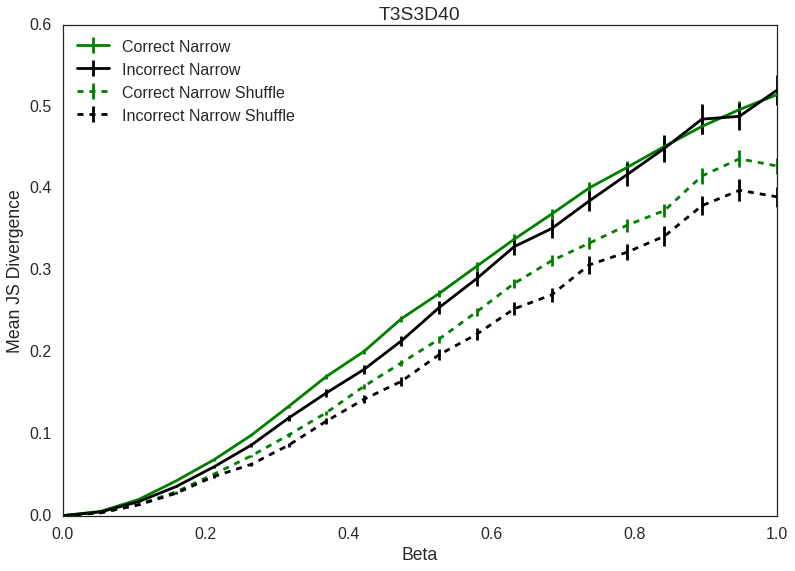

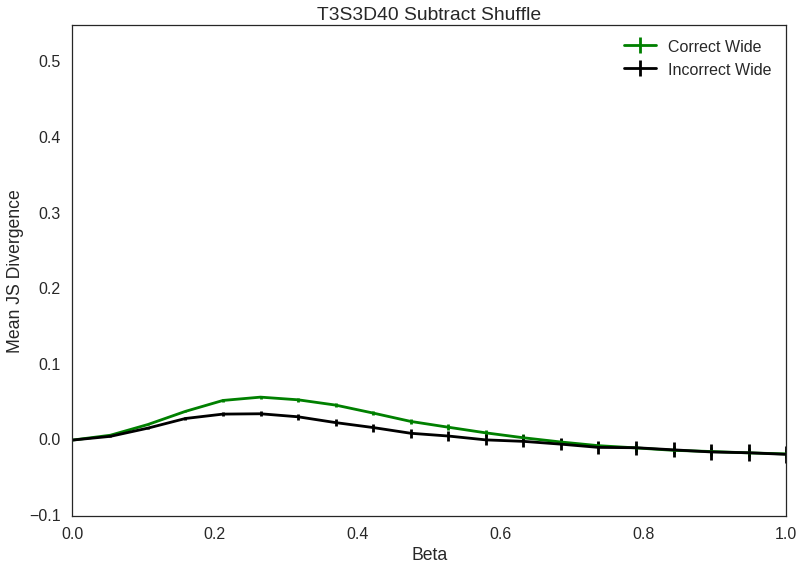

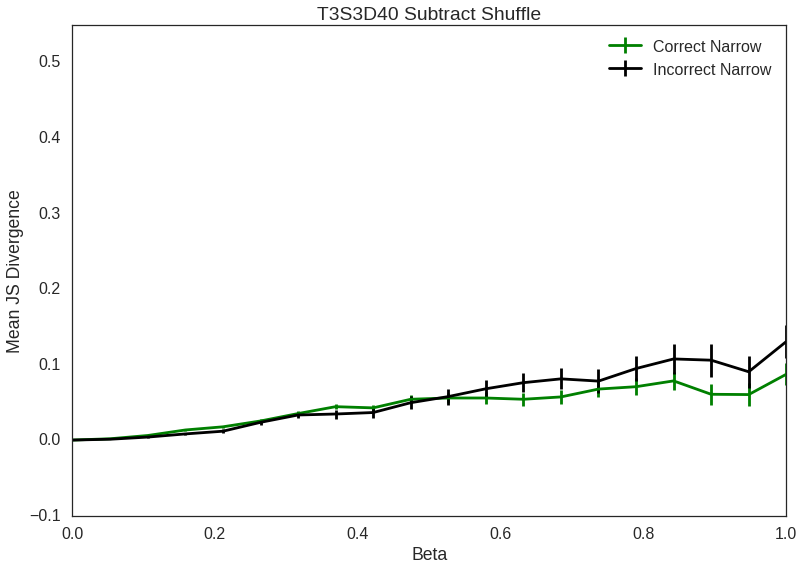

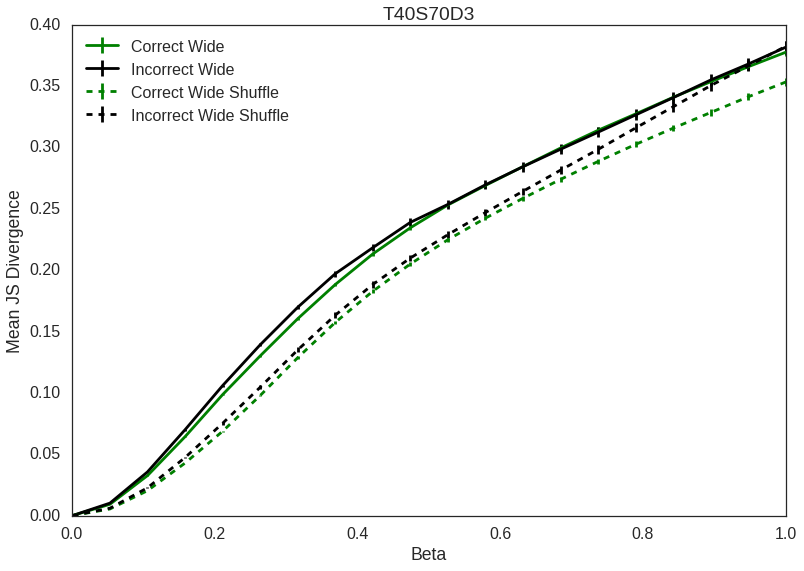

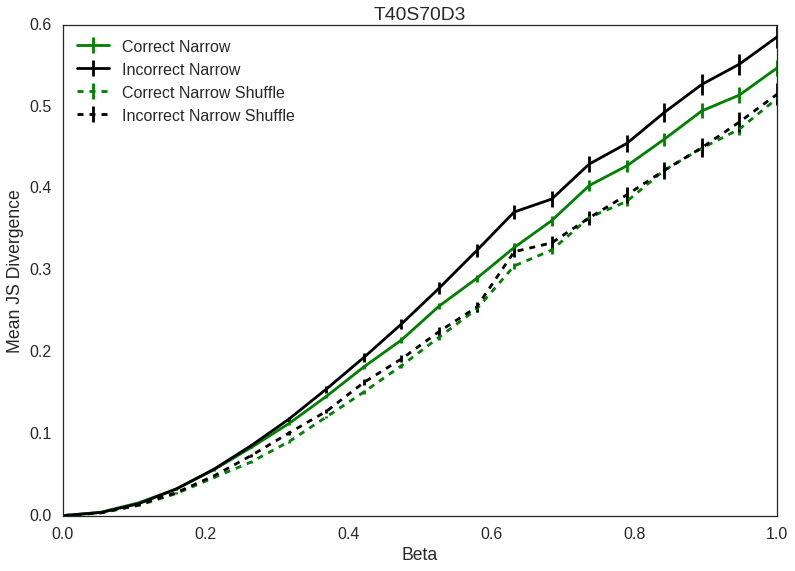

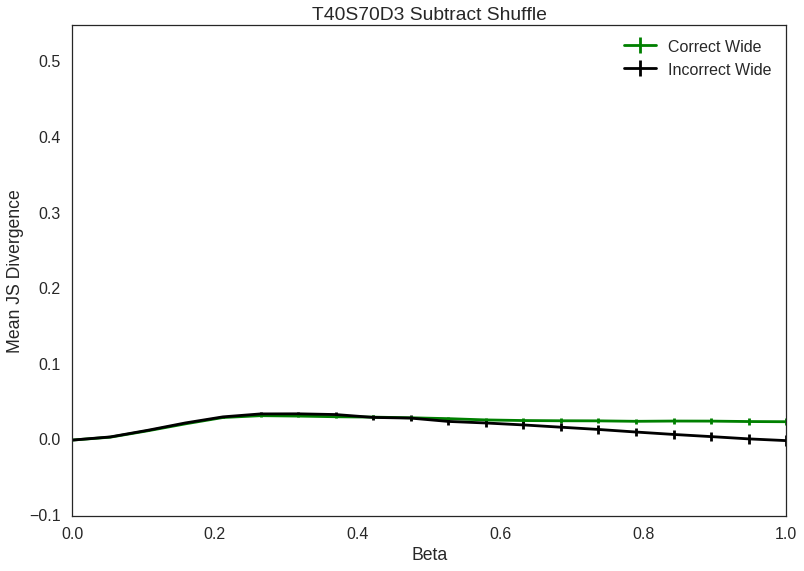

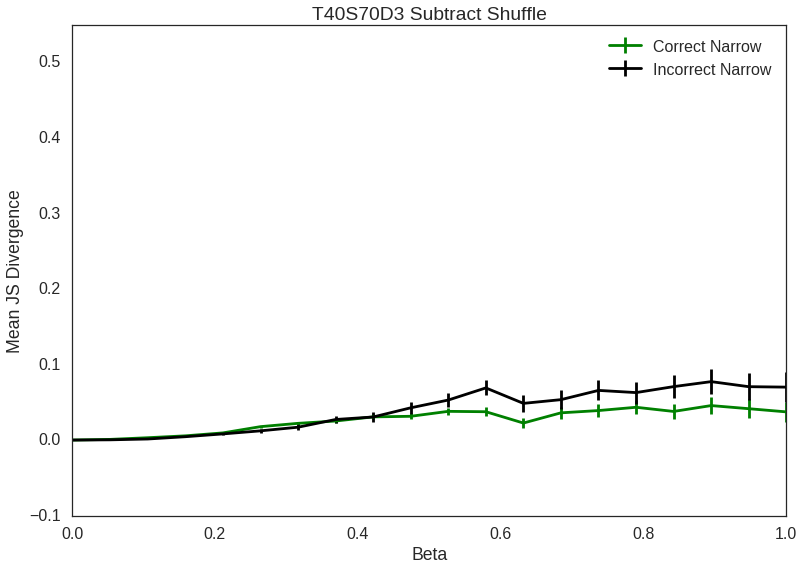

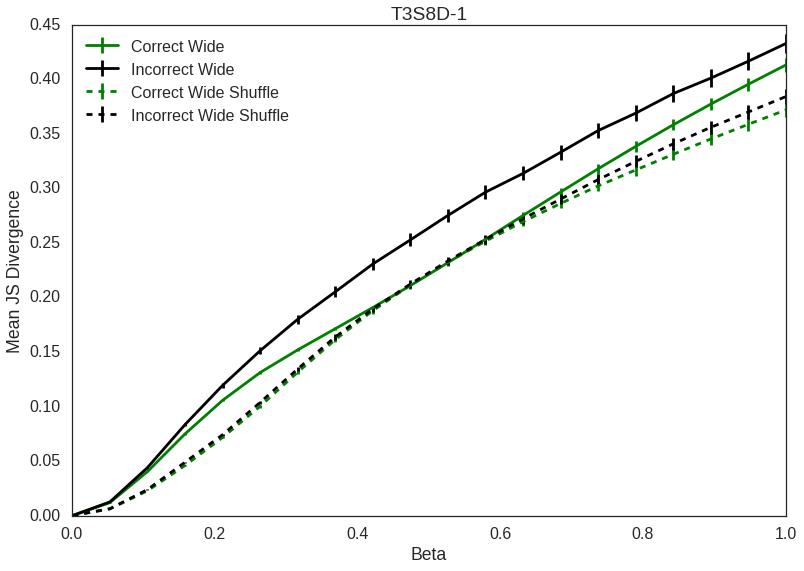

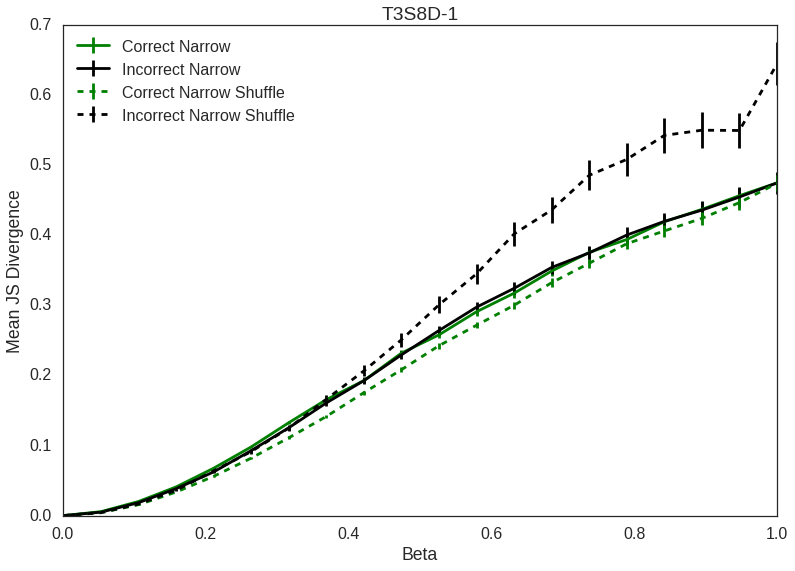

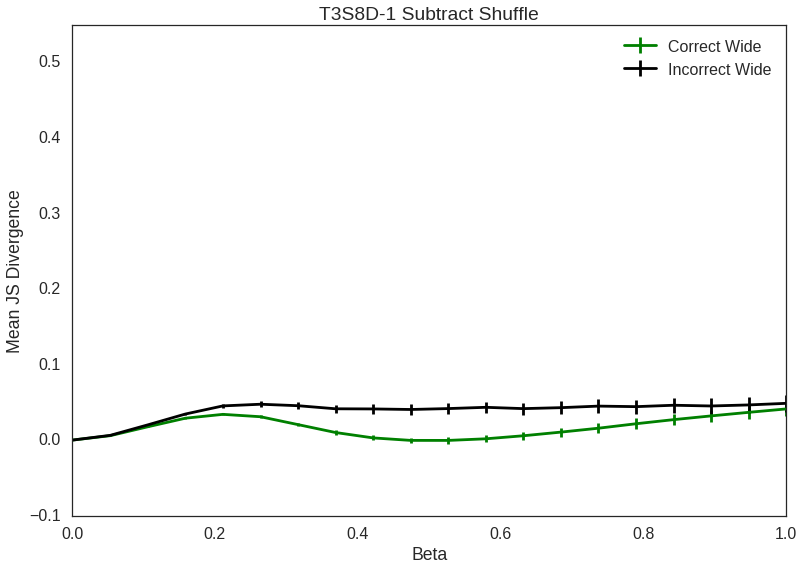

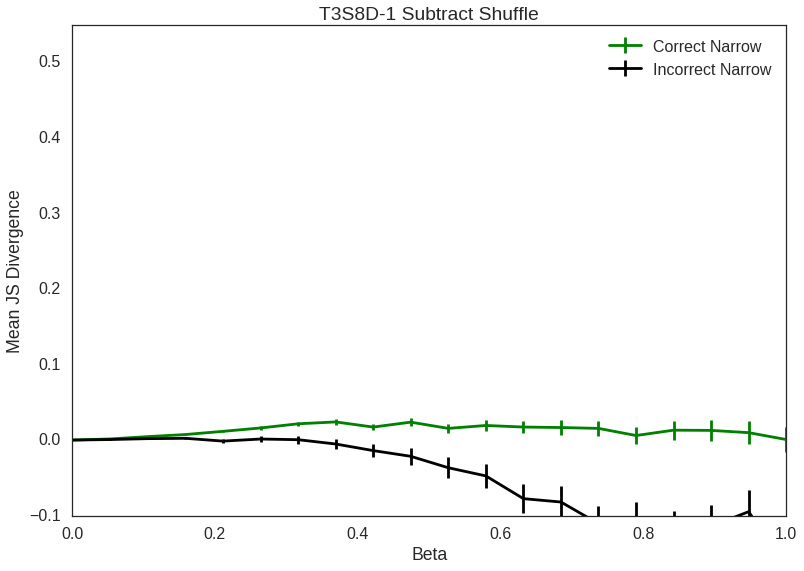

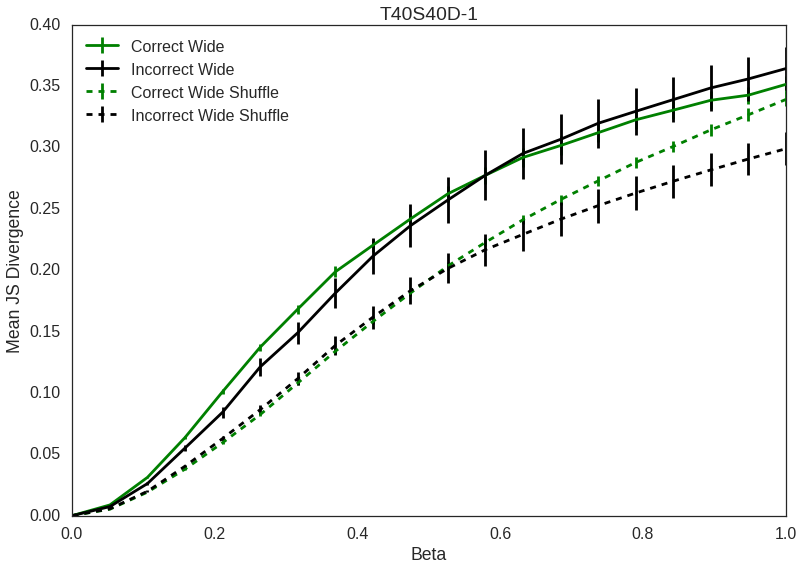

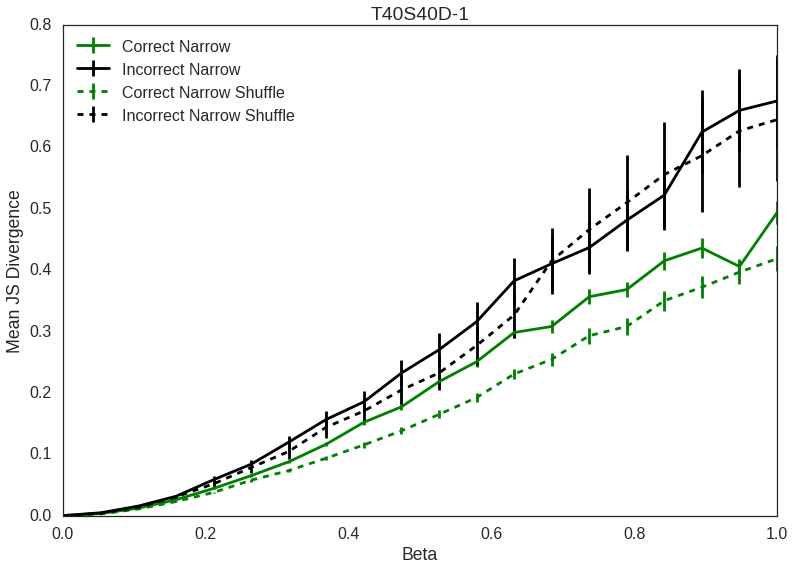

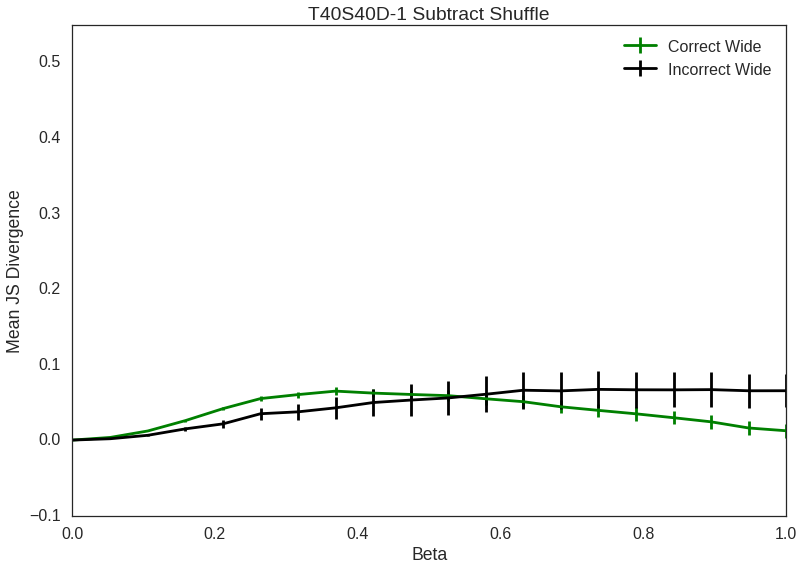

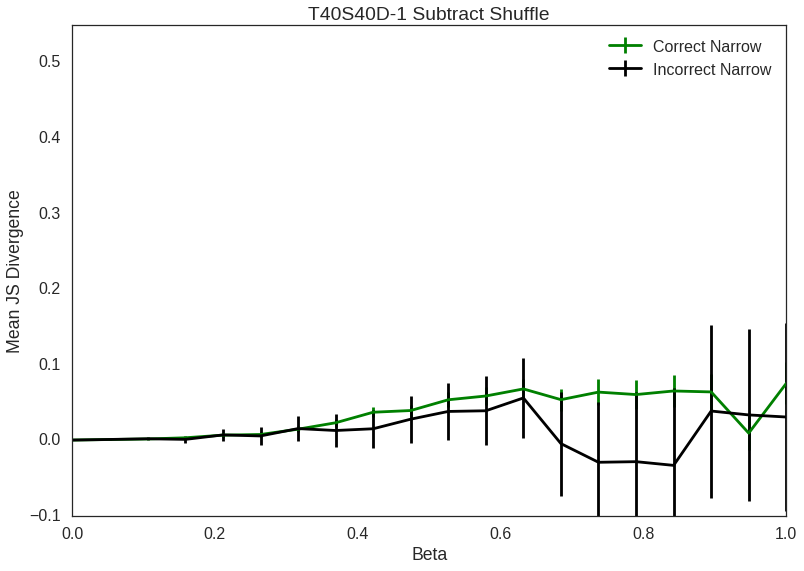

In [10]:
# Plot mean JSD on correct / Incorrect
#wide
datestring = datetime.datetime.now().strftime('%Y%m%d-%H%M')
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparison_versionFull.pkl'), 'r') as out:
    AllSave=pickle.load(out)
    
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparison_shuffle_versionFull.pkl'), 'r') as out:
    AllSaveShuff=pickle.load(out)
    
with open('/home/brad/emily/P01S15/20170613-1059_B604_1SLSE_pairwise_comparison.pkl', 'r') as out:
    AllSave=pickle.load(out)
    
with open('/home/brad/emily/P01S15/20170613-1226_B604_1SLSE_pairwise_comparison_shuffled.pkl', 'r') as out:
    AllSaveShuff=pickle.load(out)

diffsave_wide = []
diffsave_narrow = []
diffsave_wide_correct = []
diffsave_wide_incorrect = []
diffsave_narrow_correct = []
diffsave_narrow_incorrect = []
dat_wide = {}
dat_narrow = {}
dat_wide_correct = {}
dat_narrow_correct = {}
dat_wide_incorrect = {}
dat_narrow_incorrect = {}
cw = AllSave['Targ-correct-wide.scg']
xw = AllSave['Targ-incorrect-wide.scg'] # incorrect
cn = AllSave['Targ-correct-narrow.scg']
xn = AllSave['Targ-incorrect-narrow.scg']
cws = AllSaveShuff['Targ-correct-wide-shuffle.scg']
cns = AllSaveShuff['Targ-correct-narrow-shuffle.scg']
xws = AllSaveShuff['Targ-incorrect-wide-shuffle.scg']
xns = AllSaveShuff['Targ-incorrect-narrow-shuffle.scg']
for stim in cw.keys():
    cwt = cw[stim]
    cnt = cn[stim]
    xwt = xw[stim]
    xnt = xn[stim] #trials
    
    cwts = cws[stim]
    cnts = cns[stim]
    xwts = xws[stim]
    xnts = xns[stim] #trials
   
    meanJSD_cw = np.mean(cwt, axis=1)
    meanJSD_cn = np.mean(cnt, axis=1)
    meanJSD_xw = np.mean(xwt, axis=1)
    meanJSD_xn = np.mean(xnt, axis=1)
    semJSD_cw = np.std(cwt, axis=1) / np.sqrt(np.shape(cwt)[1])
    semJSD_cn = np.std(cnt, axis=1) / np.sqrt(np.shape(cnt)[1])
    semJSD_xw = np.std(xwt, axis=1) / np.sqrt(np.shape(xwt)[1])
    semJSD_xn = np.std(xnt, axis=1) / np.sqrt(np.shape(xnt)[1])
    
    meanJSD_cws = np.mean(cwts, axis=1)
    meanJSD_cns = np.mean(cnts, axis=1)
    meanJSD_xws = np.mean(xwts, axis=1)
    meanJSD_xns = np.mean(xnts, axis=1)
    semJSD_cws = np.std(cwts, axis=1) / np.sqrt(np.shape(cwts)[1])
    semJSD_cns = np.std(cnts, axis=1) / np.sqrt(np.shape(cnts)[1])
    semJSD_xws = np.std(xwts, axis=1) / np.sqrt(np.shape(xwts)[1])
    semJSD_xns = np.std(xnts, axis=1) / np.sqrt(np.shape(xnts)[1])
    
    semJSD_diff_cw = np.sqrt(np.square(semJSD_cw) + np.square(semJSD_cws))
    semJSD_diff_xw = np.sqrt(np.square(semJSD_xw) + np.square(semJSD_xws))
    semJSD_diff_cn = np.sqrt(np.square(semJSD_cn) + np.square(semJSD_cns))
    semJSD_diff_xn = np.sqrt(np.square(semJSD_xn) + np.square(semJSD_xns))
    
    plt.figure()
    plt.errorbar(betas, meanJSD_cw, yerr=semJSD_cw, fmt='g', label='Correct Wide')
    plt.errorbar(betas, meanJSD_xw, yerr=semJSD_xw, fmt='k', label='Incorrect Wide')
    plt.errorbar(betas, meanJSD_cws, yerr=semJSD_cws, fmt='g--', label='Correct Wide Shuffle')
    plt.errorbar(betas, meanJSD_xws, yerr=semJSD_xws, fmt='k--', label='Incorrect Wide Shuffle')
    plt.title(stim)
    plt.legend(loc='best')
    plt.xlabel('Beta')
    plt.ylabel('Mean JS Divergence')
    plt.savefig('/home/brad/emily/figures/{}_B604_P01S15_meanJSD_dim1_CvsX_wide_{}.png'.format(datestring, stim))
    
    plt.figure()
    plt.errorbar(betas, meanJSD_cn, yerr=semJSD_cn, fmt='g', label='Correct Narrow')
    plt.errorbar(betas, meanJSD_xn, yerr=semJSD_xn, fmt='k', label='Incorrect Narrow')
    plt.errorbar(betas, meanJSD_cns, yerr=semJSD_cns, fmt='g--', label='Correct Narrow Shuffle')
    plt.errorbar(betas, meanJSD_xns, yerr=semJSD_xns, fmt='k--', label='Incorrect Narrow Shuffle')
    plt.title(stim)
    plt.legend(loc='best')
    plt.xlabel('Beta')
    plt.ylabel('Mean JS Divergence')
    plt.savefig('/home/brad/emily/figures/{}_B604_P01S15_meanJSD_dim1_CvsX_narrow_{}.png'.format(datestring, stim))
    
    plt.figure()
    plt.errorbar(betas, meanJSD_cw - meanJSD_cws, yerr=semJSD_diff_cw, fmt='g', label='Correct Wide')
    plt.errorbar(betas, meanJSD_xw - meanJSD_xws, yerr=semJSD_diff_xw, fmt='k', label='Incorrect Wide')
    plt.title(stim +' Subtract Shuffle')
    plt.legend(loc='best')
    plt.xlabel('Beta')
    plt.ylabel('Mean JS Divergence')
    plt.ylim([-0.1, 0.55])
    plt.savefig('/home/brad/emily/figures/{}_B604_P01S15_meanJSD_dim1_subShuff_CvsX_wide_{}.png'.format(datestring, stim))
    
    plt.figure()
    plt.errorbar(betas, meanJSD_cn - meanJSD_cns, yerr=semJSD_diff_cn, fmt='g', label='Correct Narrow')
    plt.errorbar(betas, meanJSD_xn - meanJSD_xns, yerr=semJSD_diff_xn, fmt='k', label='Incorrect Narrow')
    plt.title(stim +' Subtract Shuffle')
    plt.legend(loc='best')
    plt.xlabel('Beta')
    plt.ylabel('Mean JS Divergence')
    plt.ylim([-0.1, 0.55])
    plt.savefig('/home/brad/emily/figures/{}_B604_P01S15_meanJSD_dim1_subShuff_CvsX_narrow_{}.png'.format(datestring, stim))

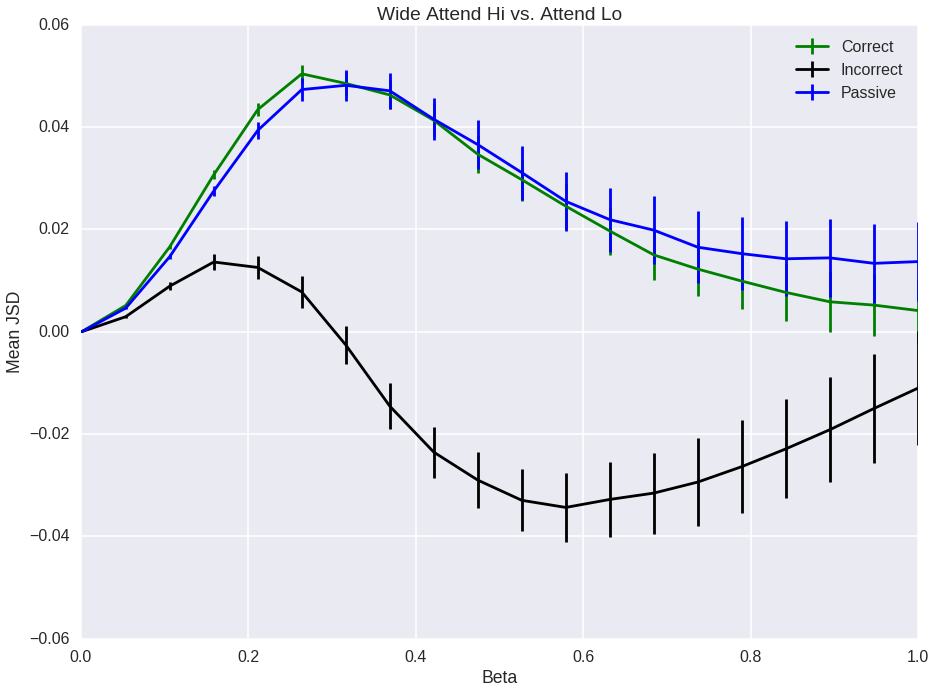

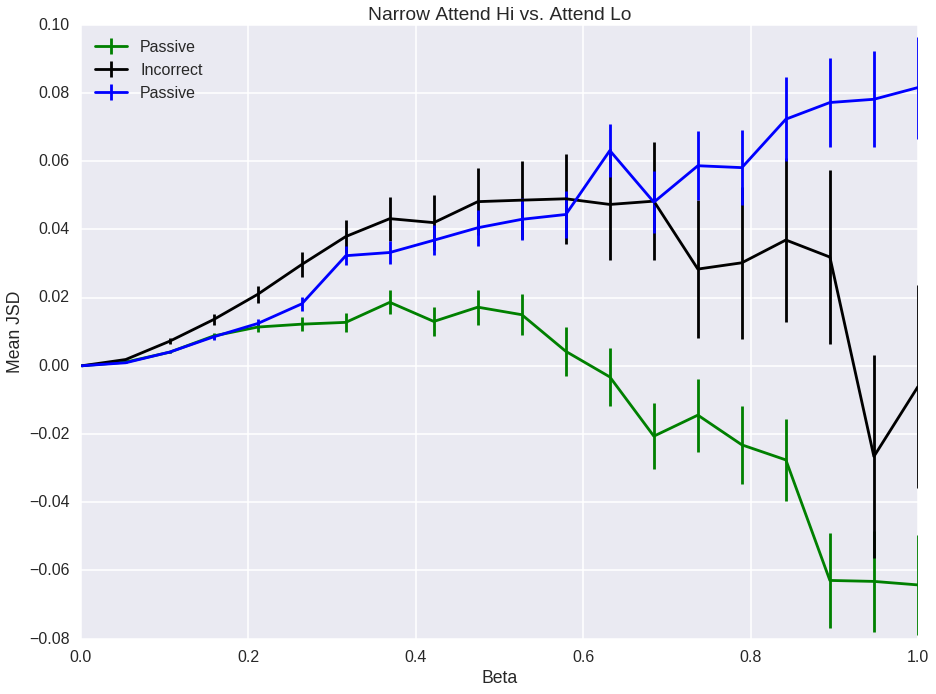

In [24]:
import seaborn as sns
sns.set_context('poster')


with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_attn_comparison_versionFull2.pkl'), 'r') as out:
    AllSave=pickle.load(out)
    
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_attn_comparison_versionFull2_shuffle.pkl'), 'r') as out:
    AllSaveShuff=pickle.load(out)
    
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_passive_HivsLo.pkl'), 'r') as out:
    AllSavePassive=pickle.load(out)   

with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_passive_HivsLo_shuffle.pkl'), 'r') as out:
    AllSavePassiveShuffle=pickle.load(out)   


cw = np.array(AllSave['SD-correct-wide.scg'])
xw = np.array(AllSave['SD-incorrect-wide.scg'])

pw = np.array(AllSavePassive['SD-passive-wide.scg'])
pn = np.array(AllSavePassive['SD-passive-narrow.scg'])

pws = np.array(AllSavePassiveShuffle['SD-passive-wide-shuffle.scg'])
pns = np.array(AllSavePassiveShuffle['SD-passive-narrow-shuffle.scg'])

cws = np.array(AllSaveShuff['SD-correct-wide-shuffle.scg'])
xws = np.array(AllSaveShuff['SD-incorrect-wide-shuffle.scg'])

cw_mean = np.mean(cw, axis=1)
xw_mean = np.mean(xw, axis=1)

pw_mean = np.mean(pw, axis=1)
pn_mean = np.mean(pn, axis=1)

cws_mean = np.mean(cws, axis=1)
xws_mean = np.mean(xws, axis=1)

pws_mean = np.mean(pws, axis=1)
pns_mean = np.mean(pns, axis=1)

cw_sem = np.std(cw, axis=1) / np.sqrt(np.shape(cw)[1])
xw_sem = np.std(xw, axis=1) / np.sqrt(np.shape(xw)[1])

cws_sem = np.std(cws, axis=1) / np.sqrt(np.shape(cws)[1])
xws_sem = np.std(xws, axis=1) / np.sqrt(np.shape(xws)[1])

pw_sem = np.std(pw, axis=1) / np.sqrt(np.shape(pw)[1])
pn_sem = np.std(pn, axis=1) / np.sqrt(np.shape(pn)[1])

pws_sem = np.std(pws, axis=1) / np.sqrt(np.shape(pws)[1])
pns_sem = np.std(pns, axis=1) / np.sqrt(np.shape(pns)[1])

#plt.figure()
#plt.errorbar(betas, cw_mean, fmt='g', yerr=cw_sem)
#plt.errorbar(betas, xw_mean, fmt='k', yerr=xw_sem)
#plt.errorbar(betas, cws_mean, fmt='g--', yerr=cws_sem)
#plt.errorbar(betas, xws_mean, fmt='k--', yerr=xws_sem)
#plt.title('Wide Attend Hi vs. Attend Lo')
#plt.xlabel('Beta')
#plt.ylabel('Mean JSD')

plt.figure(figsize=(15,11))
plt.errorbar(betas, cw_mean - cws_mean, fmt='g', yerr=np.sqrt(cw_sem**2 + cws_sem**2), label='Correct')
plt.errorbar(betas, xw_mean - xws_mean, fmt='k', yerr=np.sqrt(xw_sem**2 + xws_sem**2), label='Incorrect')
plt.errorbar(betas, pw_mean - pws_mean, fmt='b', yerr=np.sqrt(pw_sem**2 + pws_sem**2), label='Passive')
plt.title('Wide Attend Hi vs. Attend Lo')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')
plt.legend(loc='best')
plt.savefig('/home/brad/emily/figures/B604_P01S15_wide_attnHivsLo_withPassive.png')

#Narrow

cn = np.array(AllSave['SD-correct-narrow.scg'])
xn = np.array(AllSave['SD-incorrect-narrow.scg'])
cns = np.array(AllSaveShuff['SD-correct-narrow-shuffle.scg'])
xns = np.array(AllSaveShuff['SD-incorrect-narrow-shuffle.scg'])

cn_mean = np.mean(cn, axis=1)
xn_mean = np.mean(xn, axis=1)
cns_mean = np.mean(cns, axis=1)
xns_mean = np.mean(xns, axis=1)

cn_sem = np.std(cn, axis=1) / np.sqrt(np.shape(cn)[1])
xn_sem = np.std(xn, axis=1) / np.sqrt(np.shape(xn)[1])
cns_sem = np.std(cns, axis=1) / np.sqrt(np.shape(cns)[1])
xns_sem = np.std(xns, axis=1) / np.sqrt(np.shape(xns)[1])

plt.figure(figsize=(15,11))
plt.errorbar(betas, cn_mean-cns_mean, fmt='g', yerr=np.sqrt(cn_sem**2 + cns_sem**2), label='Correct')
plt.errorbar(betas, xn_mean-xns_mean, fmt='k', yerr=np.sqrt(xn_sem**2 + xns_sem**2), label='Incorrect')
plt.errorbar(betas, pn_mean - pns_mean, fmt='b', yerr=np.sqrt(pn_sem**2 + pns_sem**2), label='Passive')
plt.title('Narrow Attend Hi vs. Attend Lo')
plt.legend(loc='best')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')
plt.savefig('/home/brad/emily/figures/B604_P01S15_narrow_attnHivsLo_withPassive.png')

In [20]:
AllSavePassive.keys()

['SD-passive-wide.scg', 'SD-passive-narrow.scg']

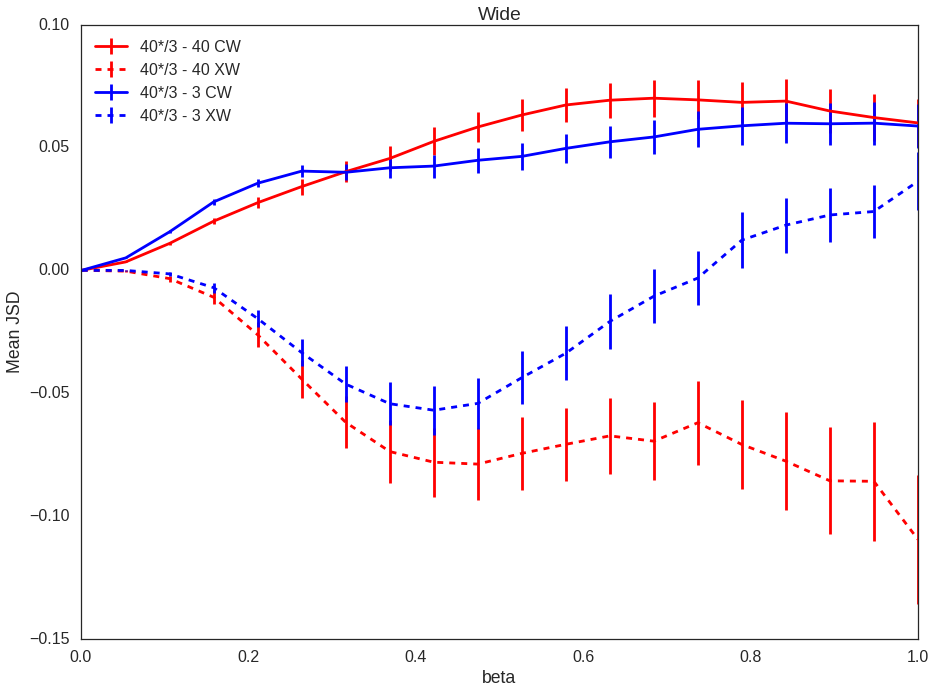

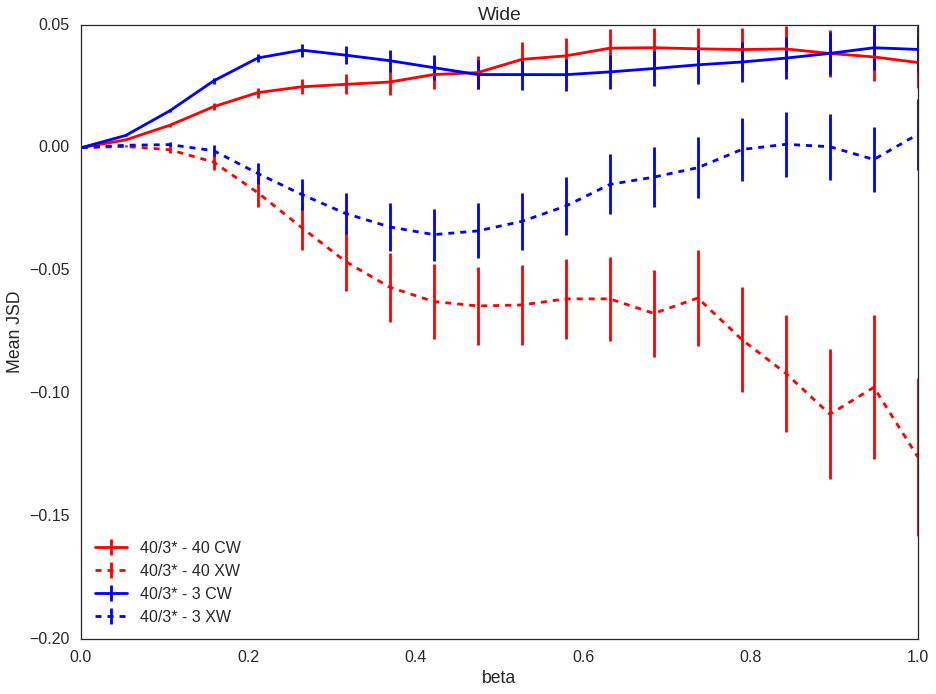

In [8]:
betas = np.linspace(0.001, 1,20)
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_emily.pkl'), 'r') as out:
    AllSave=pickle.load(out)
    
with open(os.path.join(blockPath, 'B604_1SLSE_pairwise_comparisons_emily_shuff.pkl'), 'r') as out:
    AllSaveShuff=pickle.load(out)

cw = AllSave['SD-correct-wide.scg']
xw = AllSave['SD-incorrect-wide.scg']

cws = AllSaveShuff['SD-correct-wide-shuffle.scg']
xws = AllSaveShuff['SD-incorrect-wide-shuffle.scg']

titles = {'T-1S-1D40-T40S40D3': '40*/3 - 40', 
 'T-1S-1D3-T40S40D3': '40*/3 - 3', 
 'T-1S-1D40-T3S3D40': '40/3* - 40', 
 'T-1S-1D3-T3S3D40': '40/3* - 3'}

colors = {'T-1S-1D40-T40S40D3': 'r', 
 'T-1S-1D3-T40S40D3': 'b', 
 'T-1S-1D40-T3S3D40': 'r', 
 'T-1S-1D3-T3S3D40': 'b'}
plt.figure(figsize=(15,11))
for key in cw.keys()[0:2]:
    cw_mean = np.mean(np.array(cw[key]), axis=1)
    xw_mean = np.mean(np.array(xw[key]), axis=1)
    
    cws_mean = np.mean(np.array(cws[key]), axis=1)
    xws_mean = np.mean(np.array(xws[key]), axis=1)
    
    cw_std = np.std(np.array(cw[key]), axis=1)
    xw_std = np.std(np.array(xw[key]), axis=1)
    cws_std = np.std(np.array(cws[key]), axis=1)
    xws_std = np.std(np.array(xws[key]), axis=1)
    
    cw_sem = cw_std / np.sqrt(np.shape(np.array(cw[key]))[1])
    xw_sem = xw_std / np.sqrt(np.shape(np.array(xw[key]))[1])
    cws_sem = cws_std / np.sqrt(np.shape(np.array(cws[key]))[1])
    xws_sem = xws_std / np.sqrt(np.shape(np.array(xws[key]))[1])
    
    
    plt.errorbar(betas, cw_mean - cws_mean, fmt=colors[key], yerr=np.sqrt(cw_sem**2 + cws_sem**2), label='{} CW'.format(titles[key]))
    plt.errorbar(betas, xw_mean - xws_mean, fmt=colors[key]+'--', yerr=np.sqrt(xw_sem**2 + xws_sem**2), label='{} XW'.format(titles[key]))
    plt.legend(loc='best')
    plt.xlabel('beta')
    plt.ylabel('Mean JSD')
    plt.title('Wide')
    plt.savefig('/home/brad/emily/figures/B604_P01S15_emComp_wide_40s-3.png'.format(key))
    
    
plt.figure(figsize=(15,11))
for key in cw.keys()[2:]:
    cw_mean = np.mean(np.array(cw[key]), axis=1)
    xw_mean = np.mean(np.array(xw[key]), axis=1)
    
    cws_mean = np.mean(np.array(cws[key]), axis=1)
    xws_mean = np.mean(np.array(xws[key]), axis=1)
    
    cw_std = np.std(np.array(cw[key]), axis=1)
    xw_std = np.std(np.array(xw[key]), axis=1)
    cws_std = np.std(np.array(cws[key]), axis=1)
    xws_std = np.std(np.array(xws[key]), axis=1)
    
    cw_sem = cw_std / np.sqrt(np.shape(np.array(cw[key]))[1])
    xw_sem = xw_std / np.sqrt(np.shape(np.array(xw[key]))[1])
    cws_sem = cws_std / np.sqrt(np.shape(np.array(cws[key]))[1])
    xws_sem = xws_std / np.sqrt(np.shape(np.array(xws[key]))[1])
    
    
    plt.errorbar(betas, cw_mean - cws_mean, fmt=colors[key], yerr=np.sqrt(cw_sem**2 + cws_sem**2), label='{} CW'.format(titles[key]))
    plt.errorbar(betas, xw_mean - xws_mean, fmt=colors[key]+'--', yerr=np.sqrt(xw_sem**2 + xws_sem**2), label='{} XW'.format(titles[key]))
    plt.legend(loc='best')
    plt.xlabel('beta')
    plt.ylabel('Mean JSD')
    plt.title('Wide')
    plt.savefig('/home/brad/emily/figures/B604_P01S15_emComp_wide_40-3s.png'.format(key))
    

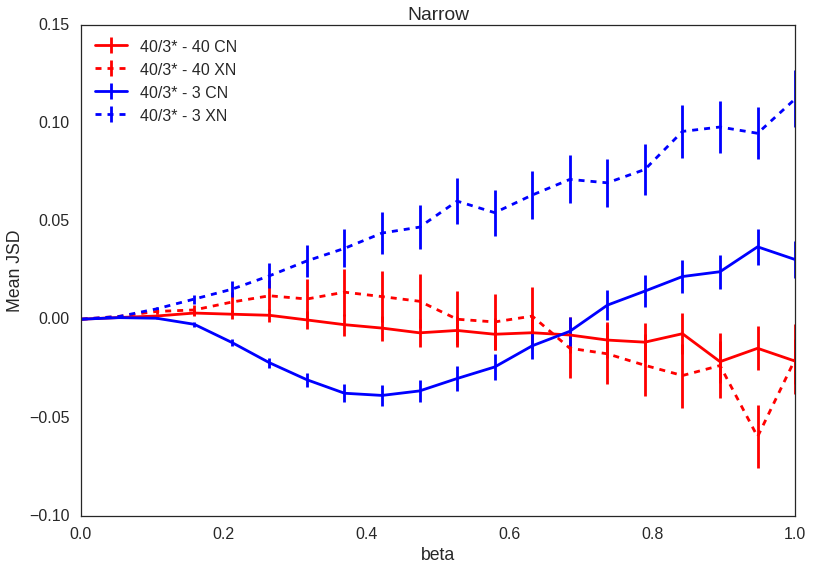

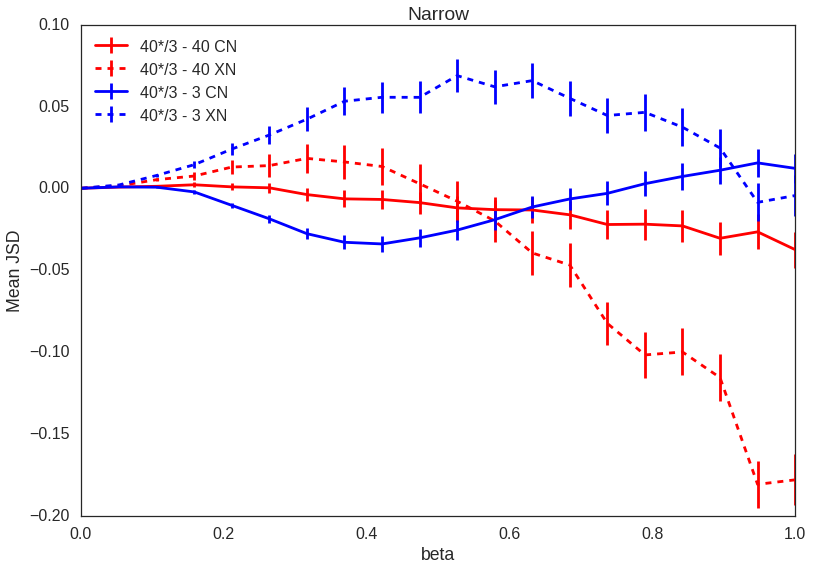

In [9]:
cn = AllSave['SD-correct-narrow.scg']
xn = AllSave['SD-incorrect-narrow.scg']

cns = AllSaveShuff['SD-correct-narrow-shuffle.scg']
xns = AllSaveShuff['SD-incorrect-narrow-shuffle.scg']

titles = {'T-1S-1D40-T40S40D3': '40*/3 - 40', 
 'T-1S-1D3-T40S40D3': '40*/3 - 3', 
 'T-1S-1D40-T3S3D40': '40/3* - 40', 
 'T-1S-1D3-T3S3D40': '40/3* - 3'}

plt.figure()
s = cn.keys()[2:]
for key in s:
    
    cn_mean = np.mean(np.array(cn[key]), axis=1)
    xn_mean = np.mean(np.array(xn[key]), axis=1)
    
    cns_mean = np.mean(np.array(cns[key]), axis=1)
    xns_mean = np.mean(np.array(xns[key]), axis=1)
    
    cn_std = np.std(np.array(cn[key]), axis=1)
    xn_std = np.std(np.array(xn[key]), axis=1)
    cns_std = np.std(np.array(cns[key]), axis=1)
    xns_std = np.std(np.array(xns[key]), axis=1)
    
    cn_sem = cw_std / np.sqrt(np.shape(np.array(cn[key]))[1])
    xn_sem = xw_std / np.sqrt(np.shape(np.array(xn[key]))[1])
    cns_sem = cws_std / np.sqrt(np.shape(np.array(cns[key]))[1])
    xns_sem = xws_std / np.sqrt(np.shape(np.array(xns[key]))[1])
    plt.errorbar(betas, cn_mean - cns_mean, fmt=colors[key], yerr=np.sqrt(cn_sem**2 + cns_sem**2), label='{} CN'.format(titles[key]))
    plt.errorbar(betas, xn_mean - xns_mean, fmt=colors[key]+'--', yerr=np.sqrt(xn_sem**2 + xns_sem**2), label='{} XN'.format(titles[key]))
    
    plt.title('Narrow')
    plt.legend(loc='best')
    plt.xlabel('beta')
    plt.ylabel('Mean JSD')
    
    plt.savefig('/home/brad/emily/figures/B604_P01S15_emComp_narrow_40-3s.png'.format(key))
    
plt.figure()
s = cn.keys()[0:2]
for key in s:
    
    cn_mean = np.mean(np.array(cn[key]), axis=1)
    xn_mean = np.mean(np.array(xn[key]), axis=1)
    
    cns_mean = np.mean(np.array(cns[key]), axis=1)
    xns_mean = np.mean(np.array(xns[key]), axis=1)
    
    cn_std = np.std(np.array(cn[key]), axis=1)
    xn_std = np.std(np.array(xn[key]), axis=1)
    cns_std = np.std(np.array(cns[key]), axis=1)
    xns_std = np.std(np.array(xns[key]), axis=1)
    
    cn_sem = cw_std / np.sqrt(np.shape(np.array(cn[key]))[1])
    xn_sem = xw_std / np.sqrt(np.shape(np.array(xn[key]))[1])
    cns_sem = cws_std / np.sqrt(np.shape(np.array(cns[key]))[1])
    xns_sem = xws_std / np.sqrt(np.shape(np.array(xns[key]))[1])
    plt.errorbar(betas, cn_mean - cns_mean, fmt=colors[key], yerr=np.sqrt(cn_sem**2 + cns_sem**2), label='{} CN'.format(titles[key]))
    plt.errorbar(betas, xn_mean - xns_mean, fmt=colors[key]+'--', yerr=np.sqrt(xn_sem**2 + xns_sem**2), label='{} XN'.format(titles[key]))
    
    plt.title('Narrow')
    plt.legend(loc='best')
    plt.xlabel('beta')
    plt.ylabel('Mean JSD')
    
    plt.savefig('/home/brad/emily/figures/B604_P01S15_emComp_narrow_40s-3.png'.format(key))

In [64]:
s

['T-1S-1D40-T3S3D40', 'T-1S-1D3-T3S3D40']

In [39]:
cw_mean

array([  4.18697784e-06,   1.07448120e-02,   3.68161036e-02,
         7.16092499e-02,   1.05630018e-01,   1.37147744e-01,
         1.64867283e-01,   1.92090163e-01,   2.15476494e-01,
         2.35964259e-01,   2.56654444e-01,   2.75661168e-01,
         2.93984297e-01,   3.11872989e-01,   3.29009991e-01,
         3.45880158e-01,   3.61877661e-01,   3.77535332e-01,
         3.93225783e-01,   4.06437306e-01])